# Conversion Rate Analysis Based On Income, Spending And Age

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#import and read dataset

df = pd.read_csv('marketing_campaign_data.csv')

## 1.0 EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

The dataset have 2240 rows dan 30 columns. Column 'Income' appear to have missing value and there is a need to fill in the missing value. The datatype seems to match with the value of each columns, except the Dt_Customer, where the data type should be datetime. 

In [4]:
# Change the data type from object to datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True )

## Feature engineering

In [5]:
df['conversion_rate'] = df['Response'] / df['NumWebVisitsMonth'] 

There seems to be a missing value for this column, and after further analysis, the missing value is resulted from 0 value for both column response and NumWebVisitsMonth. Hence, the missing value will be replaced with 0.

In [6]:
df.Year_Birth.value_counts()

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64

Few datas from column year_birth seems to be unsettling as the birth year is dated before 1901, resulting the age to be more than 100 years. I assume this to be a mistake, hence, I will be replacing these data with the mean of the birth year column. 

In [7]:
# Replace values greater than 100 with the mean
mean_yearbirth = df['Year_Birth'].mean()
df.loc[df['Year_Birth'] < 1901, 'Year_Birth'] = mean_yearbirth

# Make a new column for age 
df['Age'] = 2024 - df['Year_Birth']

In [8]:
# Group age based on life stages

def assign_group(age):
    if age <= 12:
        return 'Childhood'
    elif 13 < age <= 19:
        return 'Teen'
    elif 20 < age <= 35:
        return 'Young adult'
    elif 36 < age <= 50:
        return 'Middle aged adult'
    elif 51 < age <= 65:
        return 'Senior adult'
    else:
        return 'Elderly'

df['Age_Group'] = df['Age'].apply(assign_group)

Interpretation for Age group
- Childhood 0-12
- Teen 13-19
- Young adult 20-35
- Middle Aged Adult 36-50
- Senior Adult 51-65
- Elderly 66
- 3 --> Age >65

In [9]:
df['jumlah_anak'] = df['Kidhome'] +  df['Teenhome']

In [10]:
df['total_pengeluaran'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [11]:
df['total_transaksi'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [12]:
df['total_acc_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   float64       
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [14]:
# Group columns based on data types
cat_var = ['Education','Marital_Status','Age_Group']
numer_var =['Year_Birth','Income','Recency','Kidhome', 'Teenhome',
            'MntCoke','MntFruits','MntMeatProducts','MntFishProducts',
            'MntSweetProducts','MntGoldProds','NumDealsPurchases',
            'NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
            'NumWebVisitsMonth','Z_CostContact','Z_Revenue','conversion_rate','Age',
            'jumlah_anak', 'total_pengeluaran','total_transaksi','total_acc_campaign']
bool_var = ['AcceptedCmp3','AcceptedCmp2','AcceptedCmp1',
           'AcceptedCmp4','AcceptedCmp5','Complain','Response']
datetime_var = ['Dt_Customer']

In [15]:
df.describe()

Unnamed: 0            ID   Year_Birth        Income      Kidhome  \
count  2240.000000   2240.000000  2240.000000  2.216000e+03  2240.000000   
mean   1119.500000   5592.159821  1968.901526  5.224725e+07     0.444196   
min       0.000000      0.000000  1940.000000  1.730000e+06     0.000000   
25%     559.750000   2828.250000  1959.000000  3.530300e+07     0.000000   
50%    1119.500000   5458.500000  1970.000000  5.138150e+07     0.000000   
75%    1679.250000   8427.750000  1977.000000  6.852200e+07     1.000000   
max    2239.000000  11191.000000  1996.000000  6.666660e+08     2.000000   
std     646.776623   3246.662198    11.694076  2.517308e+07     0.538398   

          Teenhome                    Dt_Customer      Recency       MntCoke  \
count  2240.000000                           2240  2240.000000  2.240000e+03   
mean      0.506250  2013-07-10 10:01:42.857142784    49.109375  3.039357e+05   
min       0.000000            2012-07-30 00:00:00     0.000000  0.000000e+00   
25%       0.000000            2013-01-16 00:00:00    24.000000  2.375000e+04   
50%       0.000000            2013-07-08 12:00:00    49.000000  1.735000e+05   
75%       1.000000            2013-12-30 06:00:00    74.000000  5.042500e+05   
max       2.000000            2014-06-29 00:00:00    99.000000  1.493000e+06   
std       0.544538                            NaN    28.962453  3.365974e+05   

           MntFruits  ...     Complain  Z_CostContact  Z_Revenue     Response  \
count    2240.000000  ...  2240.000000         2240.0     2240.0  2240.000000   
mean    26302.232143  ...     0.009375            3.0       11.0     0.149107   
min         0.000000  ...     0.000000            3.0       11.0     0.000000   
25%      1000.000000  ...     0.000000            3.0       11.0     0.000000   
50%      8000.000000  ...     0.000000            3.0       11.0     0.000000   
75%     33000.000000  ...     0.000000            3.0       11.0     0.000000   
max    199000.000000  ...     1.000000            3.0       11.0     1.000000   
std     39773.433765  ...     0.096391            0.0        0.0     0.356274   

       conversion_rate          Age  jumlah_anak  total_pengeluaran  \
count      2229.000000  2240.000000  2240.000000       2.240000e+03   
mean          0.043686    55.098474     0.950446       6.057982e+05   
min           0.000000    28.000000     0.000000       5.000000e+03   
25%           0.000000    47.000000     0.000000       6.875000e+04   
50%           0.000000    54.000000     1.000000       3.960000e+05   
75%           0.000000    65.000000     1.000000       1.045500e+06   
max           1.000000    84.000000     3.000000       2.525000e+06   
std           0.142981    11.694076     0.751803       6.022493e+05   

       total_transaksi  total_acc_campaign  
count      2240.000000         2240.000000  
mean         14.862054            0.297768  
min           0.000000            0.000000  
25%           8.000000            0.000000  
50%          15.000000            0.000000  
75%          21.000000            0.000000  
max          44.000000            4.000000  
std           7.677173            0.678381  

[8 rows x 34 columns]

- Year_Birth = slightly negatively skewed, median (1970) > mean (1968), min: 1893, max: 1996
- Income = near normal distribution, mean (52.2m) > med(51.3m), min: 1.7m, max: 666m
- Kidhome = near normal distribution, mean (0.4) > med (0), min:0, max:2
- Teenhome = near normal distribution, mean (0.5) > med (0), min:0, max:2
- Recency = normal distribution mean = med (49), min:0, max:99
- MntCoke = positive skewed, mean(3039) > med(1735), min:0, max:14930
- MntFruits = positive skewed, mean(26302) > med(8000), min: 0, max: 199000
- MntMeatProducts = positive skewed, mean(166950) > med(67000.00), min:0, max:1725000
- MntFishProducts = positive skewed, mean(37525.4) > med(12000.0), min: 0, max: 259000.0
- MntSweetProducts = positive skewed, mean(27062.9) > med(8000.0), min: 0, max: 263000.0
- MntGoldProds = positive skewed, mean(44021.9) > med(24000), min: 0, max: 362000.0
- NumDealsPurchases = near normal distribution, mean (2.3) > med (2.0), min:0, max:15
- NumWebPurchases = near normal distribution, mean (4.1) > med (4.0), min:0, max:27
- NumCatalogPurchases = near normal distribution, mean (2.7) > med (2.0), min:0, max:28
- NumStorePurchases = near normal distribution, mean (5.8) > med (5.0), min:0, max:13
- NumWebVisitsMonth = near normal distribution, mean (5.3) > med(6.0), min: 1.7m, max: 20
- conversion_rate = normal distibution, mean = med (0)
- Z_CostContact, Z_Revenue = normal
- Age = near normal distributiom, mean (55.1) > med(54), min: 28, max: 84
- Jumlah_anak = slightly negatively skewed, median (0.95) > mean(1.0), min: 0, max: 3
- total_pengeluaran = positive skewed, mean (605798.2) > median (396000.0), min: 5000, max: 2525000
- total_transaksi = slightly negatively skewed, median (15.0) > mean(14.9), min: 0, max: 44
- total_acc_campaign = normal distribution, mean (0.3) > median (0), min: 0, max: 4


In [16]:
df_cat = df[cat_var]

for i in df_cat:
    print("-" * 30) 
    print(f'Columns: {i}')
    print(df_cat[i].value_counts())
print("=" * 30) 

------------------------------
Columns: Education
Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: count, dtype: int64
------------------------------
Columns: Marital_Status
Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: count, dtype: int64
------------------------------
Columns: Age_Group
Age_Group
Senior adult         803
Middle aged adult    727
Elderly              619
Young adult           91
Name: count, dtype: int64


- Most of the customers are bachelor graduate from university
- Most of the customers are married
- Most of the customers are senior adult which aged between 51 to 65

In [17]:
df_bool = df[bool_var]

for i in df_bool:
    print("-" * 30) 
    print(f'Columns: {i}')
    print(df_bool[i].value_counts())
print("=" * 30) 

------------------------------
Columns: AcceptedCmp3
AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64
------------------------------
Columns: AcceptedCmp2
AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64
------------------------------
Columns: AcceptedCmp1
AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64
------------------------------
Columns: AcceptedCmp4
AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64
------------------------------
Columns: AcceptedCmp5
AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64
------------------------------
Columns: Complain
Complain
0    2219
1      21
Name: count, dtype: int64
------------------------------
Columns: Response
Response
0    1906
1     334
Name: count, dtype: int64


Most of customers did not accept campaign 1-5. did not file any complain and did not respond

## Univariate Analysis

### a. Numerical

#### Income

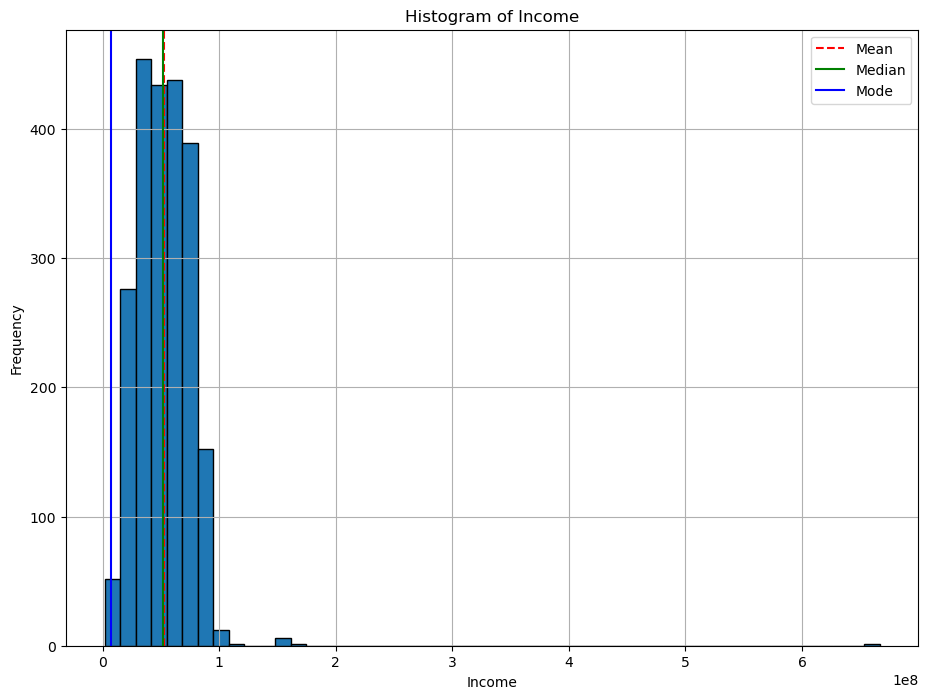

In [18]:
# Income

mean=df['Income'].mean()
median=df['Income'].median()
mode=df['Income'].mode().values[0]

plt.figure(figsize=(11,8))
df['Income'].hist(bins=50, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Age

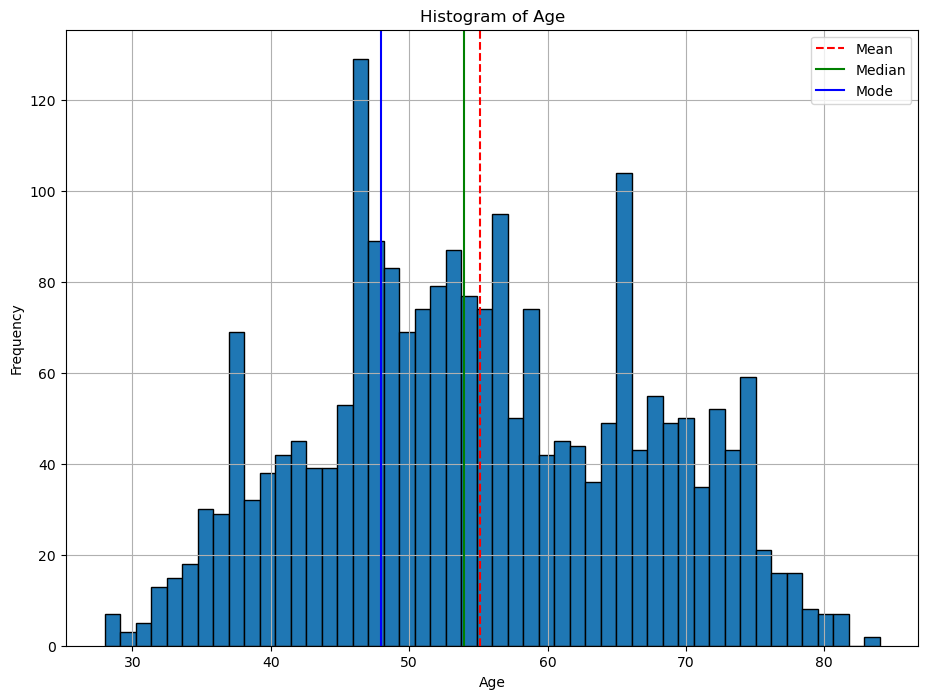

In [19]:
# Age

mean=df['Age'].mean()
median=df['Age'].median()
mode=df['Age'].mode().values[0]

plt.figure(figsize=(11,8))
df['Age'].hist(bins=50, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Kidhome

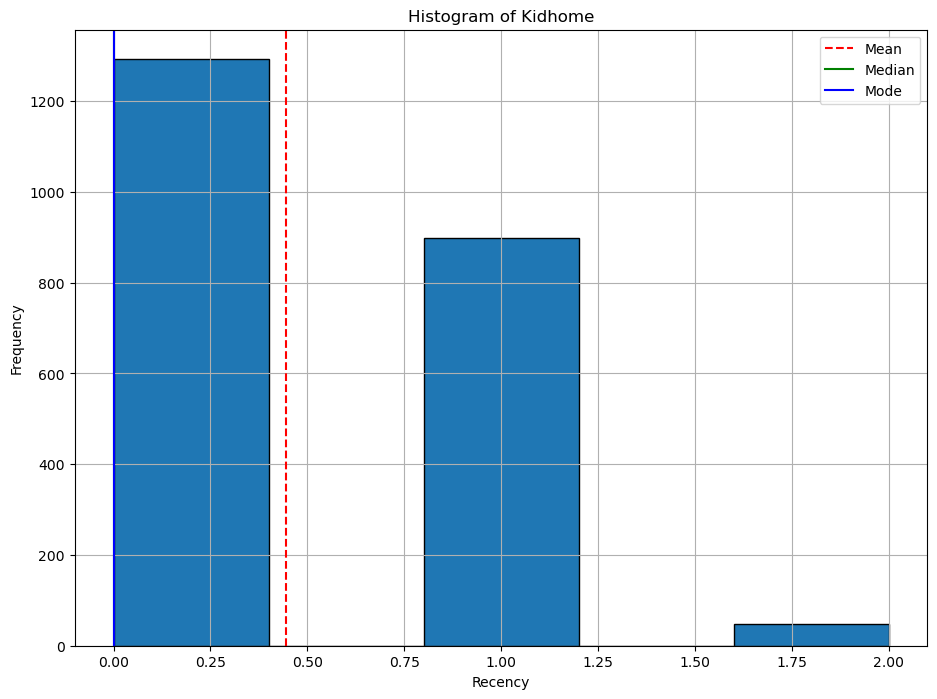

In [20]:
# Kidhome

mean=df['Kidhome'].mean()
median=df['Kidhome'].median()
mode=df['Kidhome'].mode().values[0]

plt.figure(figsize=(11,8))
df['Kidhome'].hist(bins=5, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of Kidhome')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Teenhome

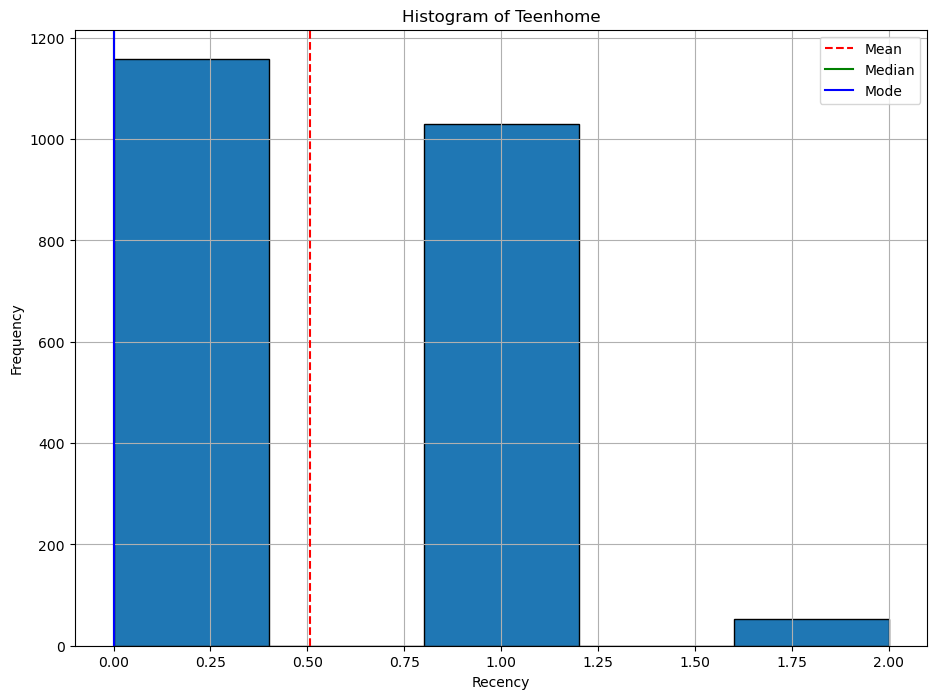

In [21]:
# Teenhome

mean=df['Teenhome'].mean()
median=df['Teenhome'].median()
mode=df['Teenhome'].mode().values[0]

plt.figure(figsize=(11,8))
df['Teenhome'].hist(bins=5, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of Teenhome')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Jumlah Anak

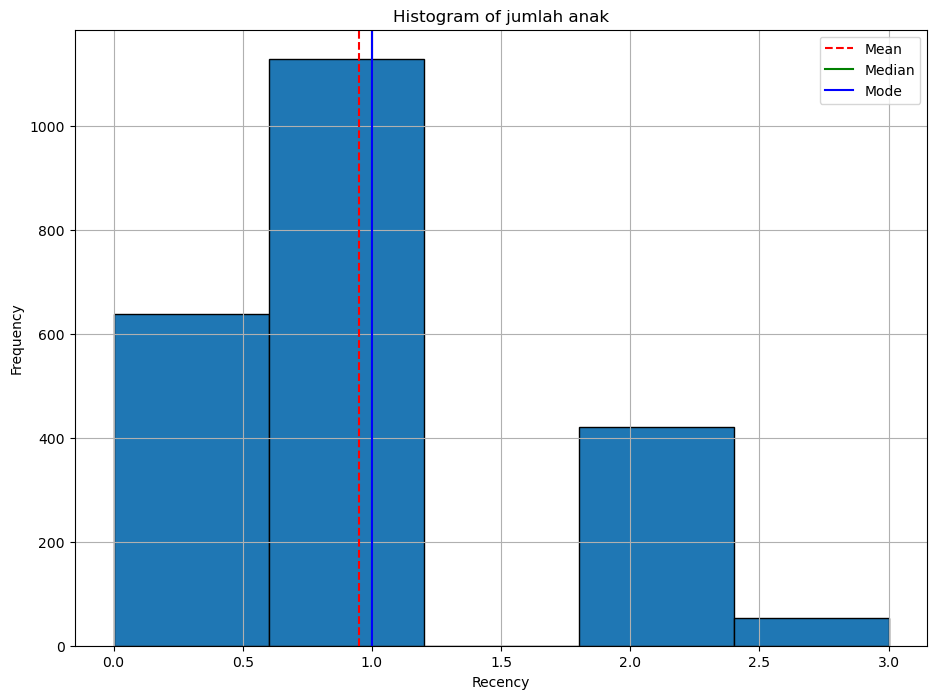

In [22]:
# Jumlah anak

mean=df['jumlah_anak'].mean()
median=df['jumlah_anak'].median()
mode=df['jumlah_anak'].mode().values[0]

plt.figure(figsize=(11,8))
df['jumlah_anak'].hist(bins=5, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of jumlah anak')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [23]:
round(df.jumlah_anak.describe(), 1)

count    2240.0
mean        1.0
std         0.8
min         0.0
25%         0.0
50%         1.0
75%         1.0
max         3.0
Name: jumlah_anak, dtype: float64

#### Recency

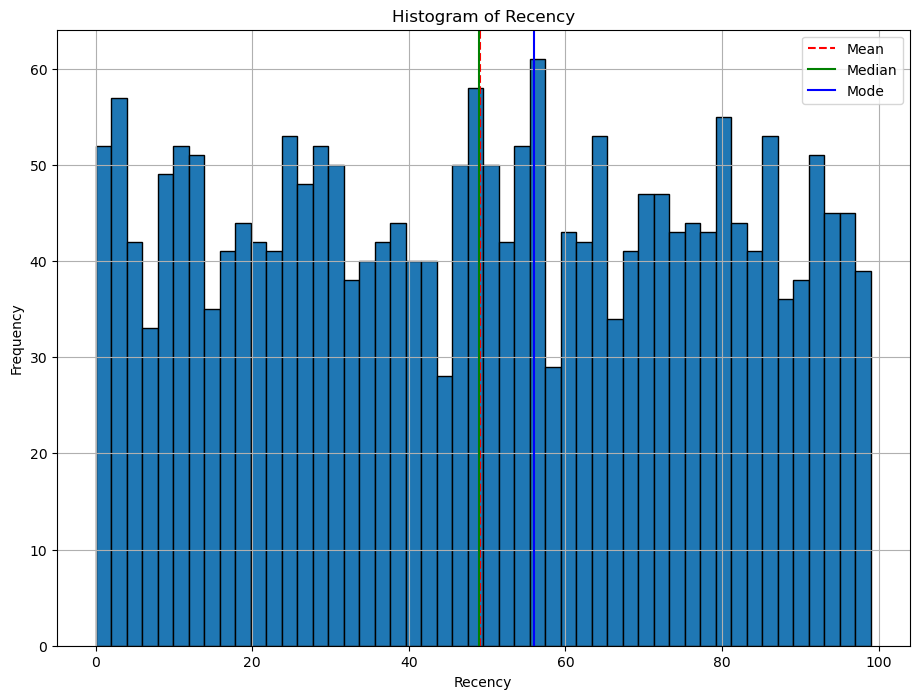

In [24]:
# Recency

mean=df['Recency'].mean()
median=df['Recency'].median()
mode=df['Recency'].mode().values[0]

plt.figure(figsize=(11,8))
df['Recency'].hist(bins=50, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### MntCoke

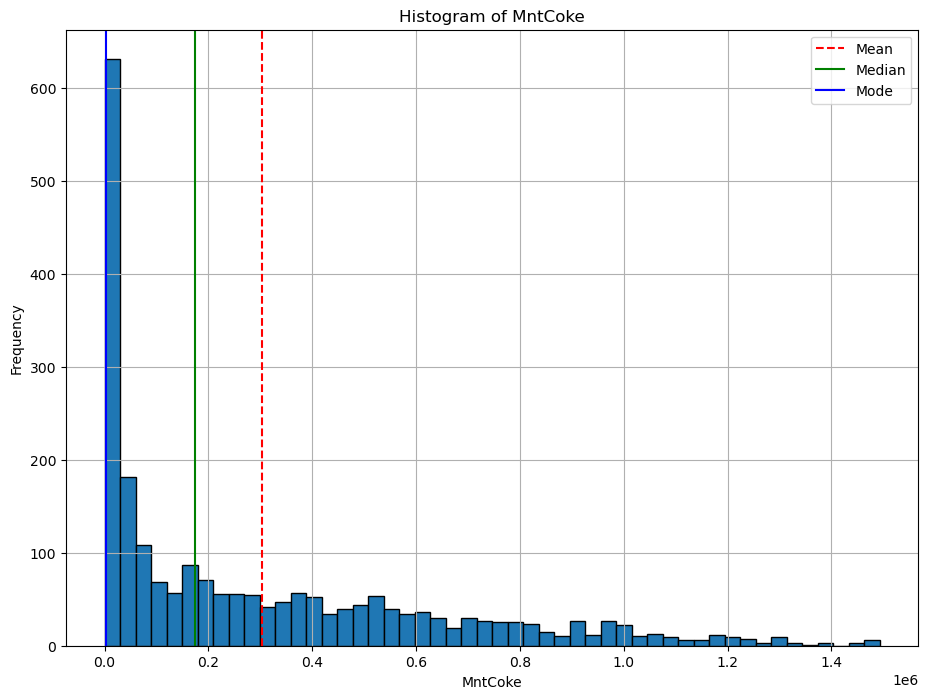

In [25]:
# MntCoke

mean=df['MntCoke'].mean()
median=df['MntCoke'].median()
mode=df['MntCoke'].mode().values[0]

plt.figure(figsize=(11,8))
df['MntCoke'].hist(bins=50, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of MntCoke')
plt.xlabel('MntCoke')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### MntFruits

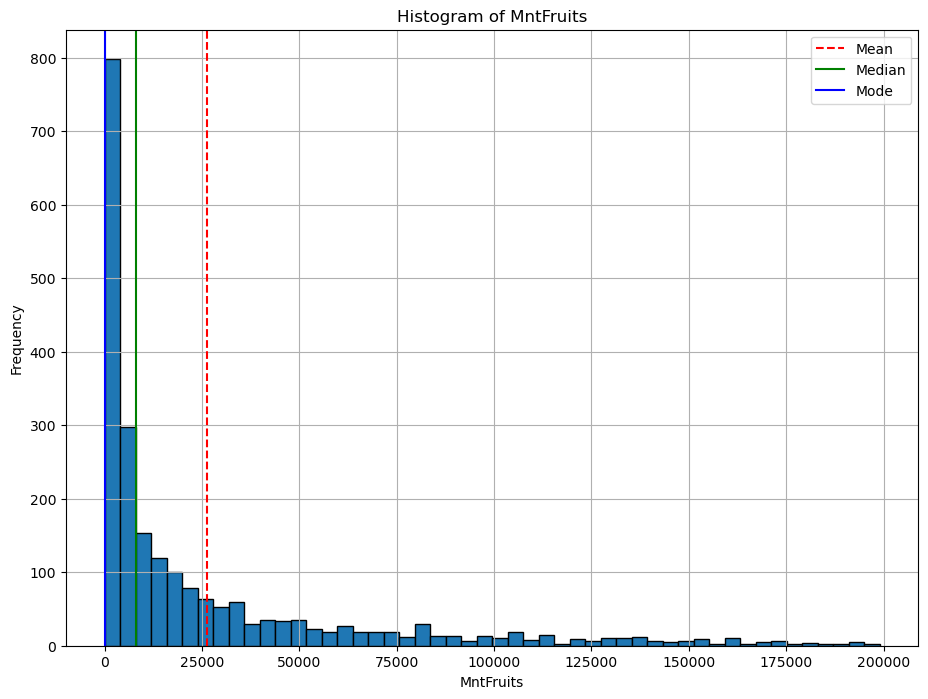

In [26]:
# MntFruits

mean=df['MntFruits'].mean()
median=df['MntFruits'].median()
mode=df['MntFruits'].mode().values[0]

plt.figure(figsize=(11,8))
df['MntFruits'].hist(bins=50, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of MntFruits')
plt.xlabel('MntFruits')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### MntMeatProducts

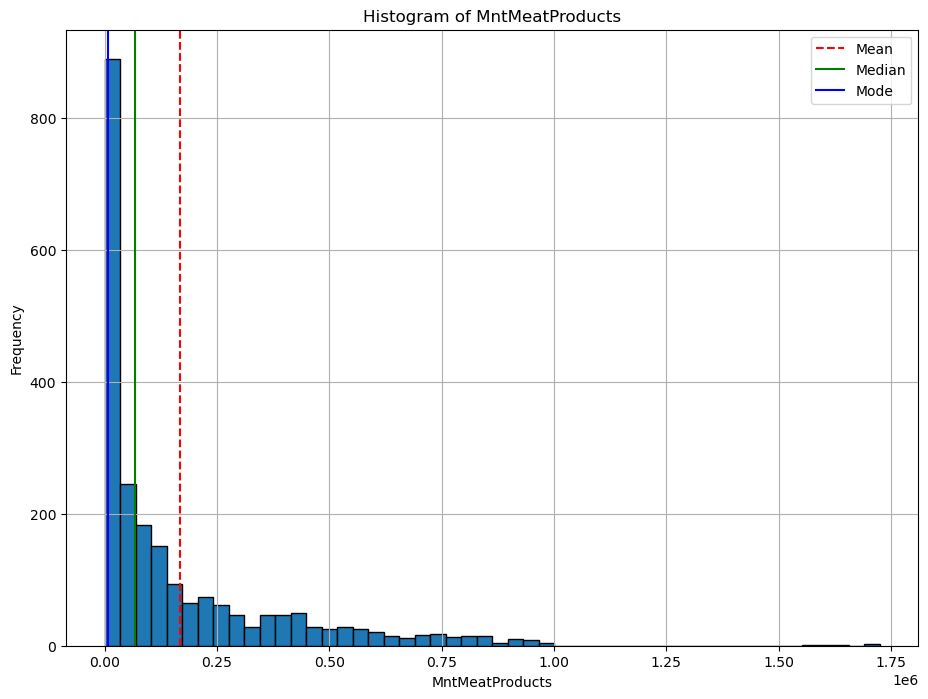

In [27]:
# MntMeatProducts

mean=df['MntMeatProducts'].mean()
median=df['MntMeatProducts'].median()
mode=df['MntMeatProducts'].mode().values[0]

plt.figure(figsize=(11,8))
df['MntMeatProducts'].hist(bins=50, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of MntMeatProducts')
plt.xlabel('MntMeatProducts')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### MntFishProducts

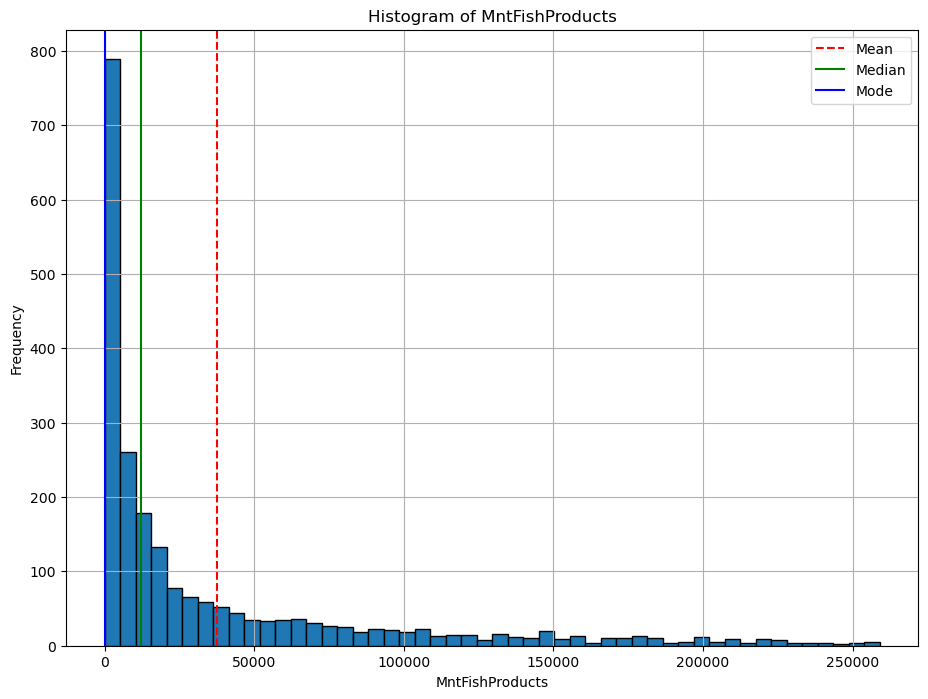

In [28]:
# MntFishProducts

mean=df['MntFishProducts'].mean()
median=df['MntFishProducts'].median()
mode=df['MntFishProducts'].mode().values[0]

plt.figure(figsize=(11,8))
df['MntFishProducts'].hist(bins=50, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of MntFishProducts')
plt.xlabel('MntFishProducts')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### MntSweetProducts

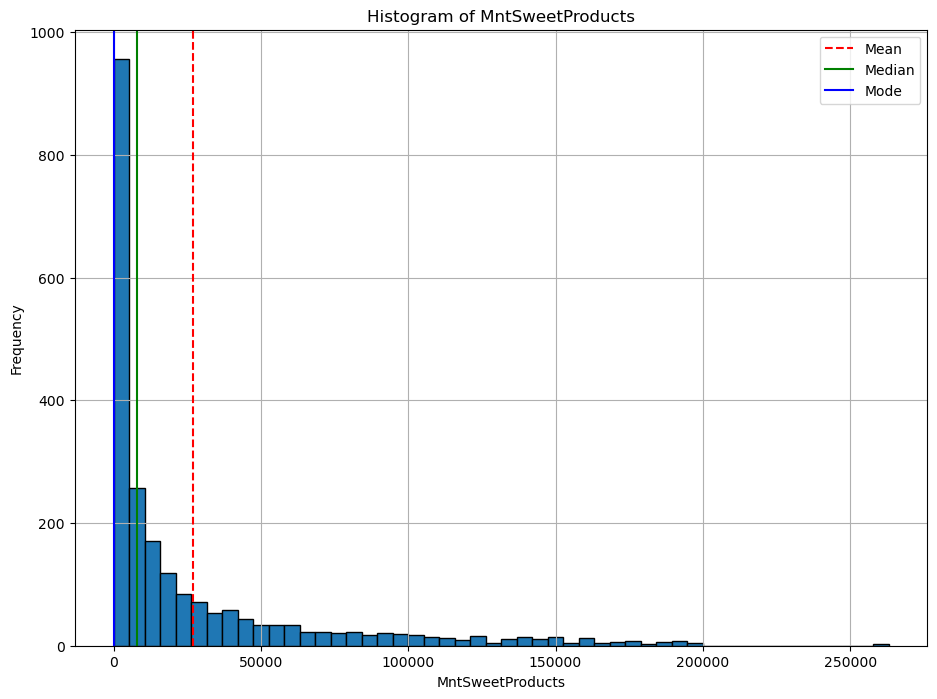

In [29]:
# MntSweetProducts

mean=df['MntSweetProducts'].mean()
median=df['MntSweetProducts'].median()
mode=df['MntSweetProducts'].mode().values[0]

plt.figure(figsize=(11,8))
df['MntSweetProducts'].hist(bins=50, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of MntSweetProducts')
plt.xlabel('MntSweetProducts')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### MntGoldProds

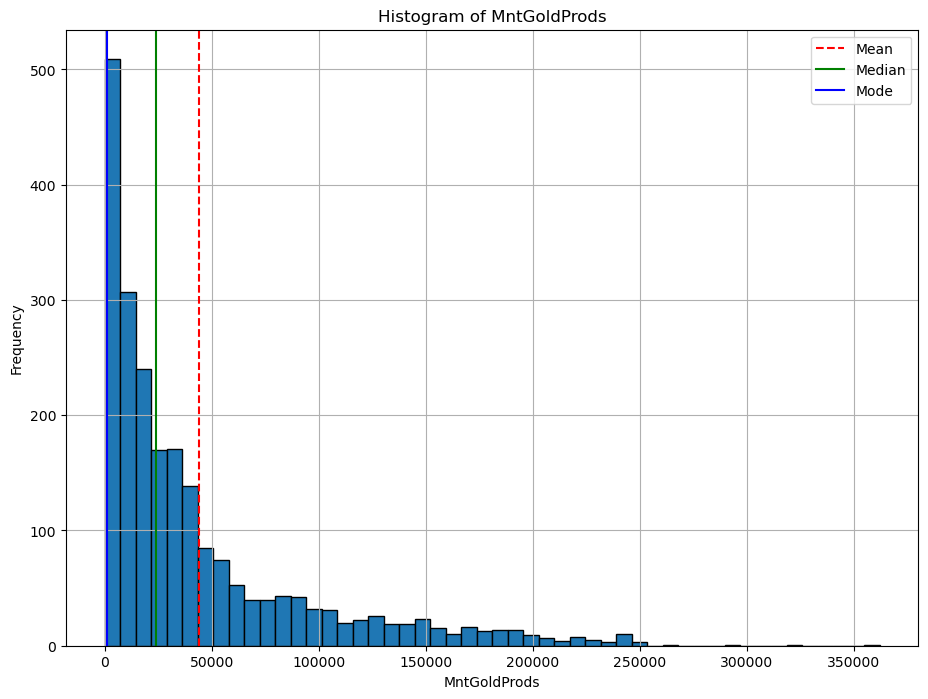

In [30]:
# MntGoldProds

mean=df['MntGoldProds'].mean()
median=df['MntGoldProds'].median()
mode=df['MntGoldProds'].mode().values[0]

plt.figure(figsize=(11,8))
df['MntGoldProds'].hist(bins=50,edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of MntGoldProds')
plt.xlabel('MntGoldProds')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Total Pengeluaran

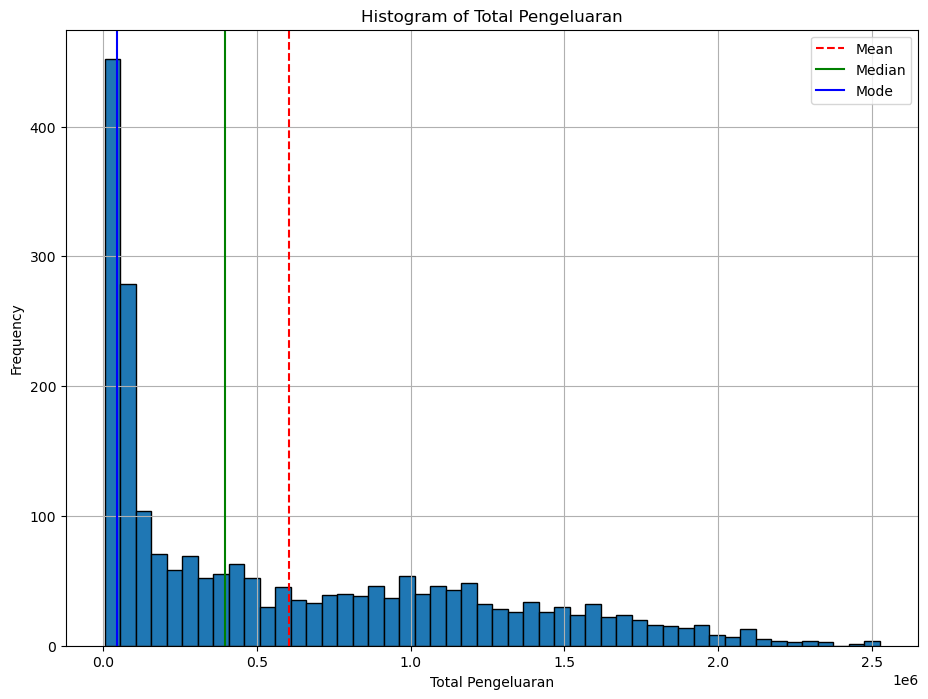

In [31]:
# MntGoldProds

mean=df['total_pengeluaran'].mean()
median=df['total_pengeluaran'].median()
mode=df['total_pengeluaran'].mode().values[0]

plt.figure(figsize=(11,8))
df['total_pengeluaran'].hist(bins=50,edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of Total Pengeluaran')
plt.xlabel('Total Pengeluaran')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### NumDealsPurchases

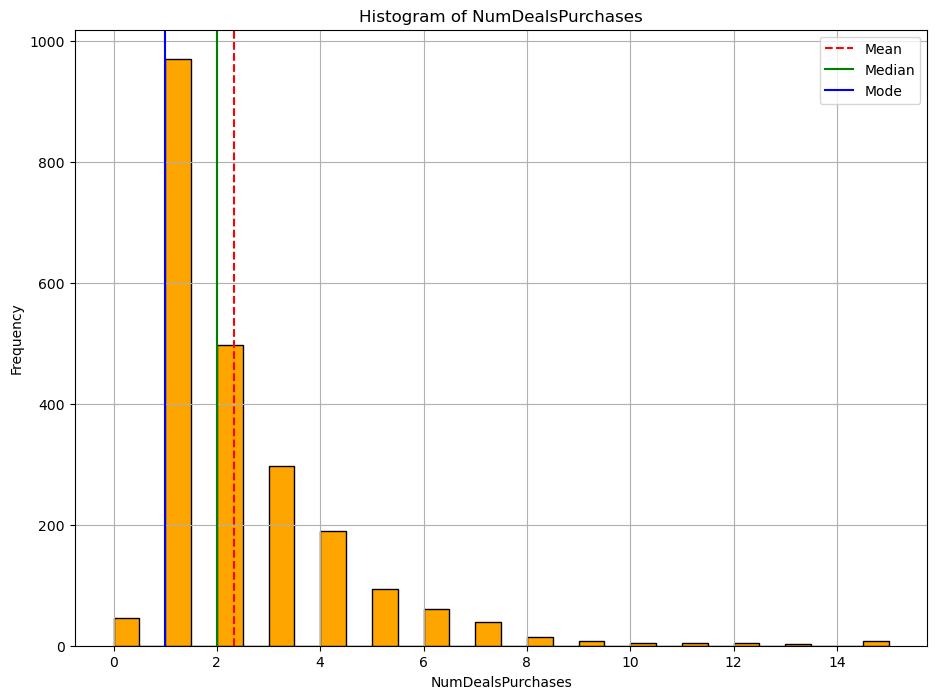

In [33]:
# NumDealsPurchases

mean=df['NumDealsPurchases'].mean()
median=df['NumDealsPurchases'].median()
mode=df['NumDealsPurchases'].mode().values[0]

plt.figure(figsize=(11,8))
df['NumDealsPurchases'].hist(bins=30, edgecolor='black',color='orange')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of NumDealsPurchases')
plt.xlabel('NumDealsPurchases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### NumWebPurchases

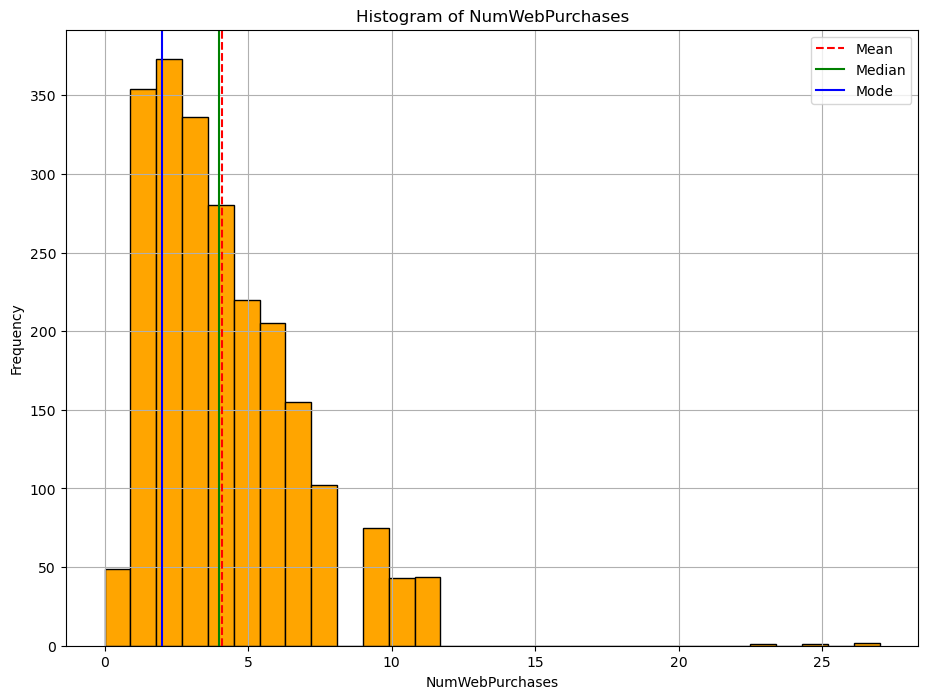

In [34]:
# NumWebPurchases

mean=df['NumWebPurchases'].mean()
median=df['NumWebPurchases'].median()
mode=df['NumWebPurchases'].mode().values[0]

plt.figure(figsize=(11,8))
df['NumWebPurchases'].hist(bins=30, edgecolor='black', color='orange')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of NumWebPurchases')
plt.xlabel('NumWebPurchases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### NumCatalogPurchases

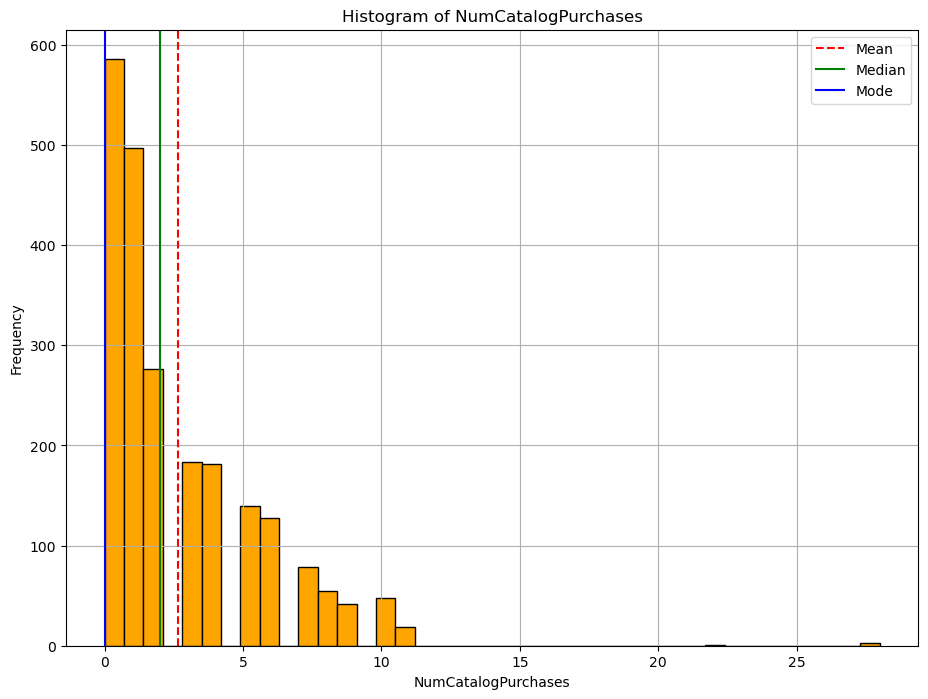

In [35]:
# NumCatalogPurchases

mean=df['NumCatalogPurchases'].mean()
median=df['NumCatalogPurchases'].median()
mode=df['NumCatalogPurchases'].mode().values[0]

plt.figure(figsize=(11,8))
df['NumCatalogPurchases'].hist(bins=40, edgecolor='black', color='orange')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of NumCatalogPurchases')
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### NumStorePurchases

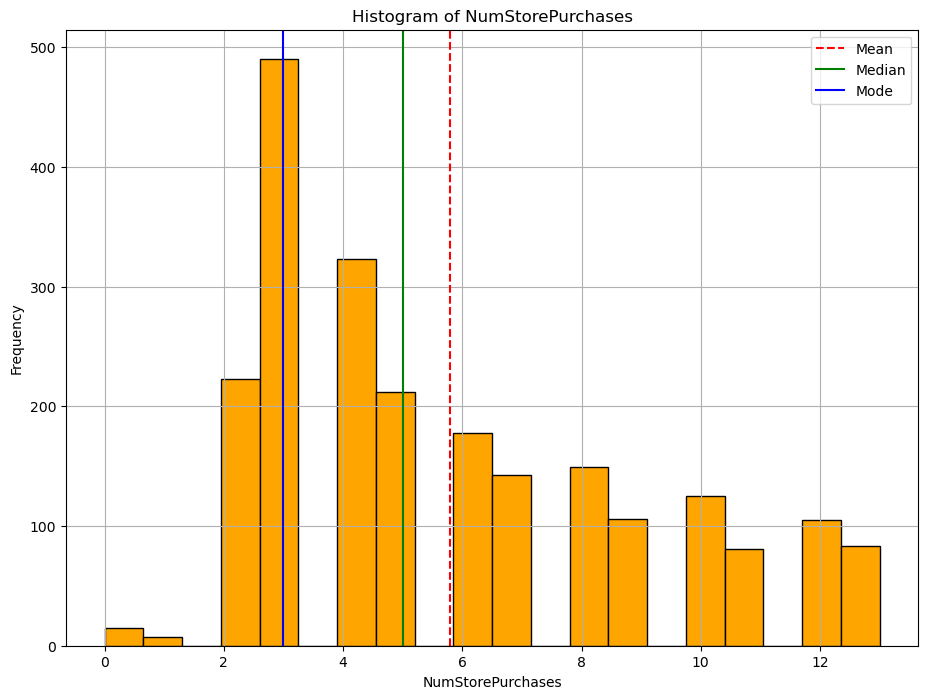

In [36]:
# NumStorePurchases

mean=df['NumStorePurchases'].mean()
median=df['NumStorePurchases'].median()
mode=df['NumStorePurchases'].mode().values[0]

plt.figure(figsize=(11,8))
df['NumStorePurchases'].hist(bins=20, edgecolor='black',color='orange')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of NumStorePurchases')
plt.xlabel('NumStorePurchases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Total Transaksi

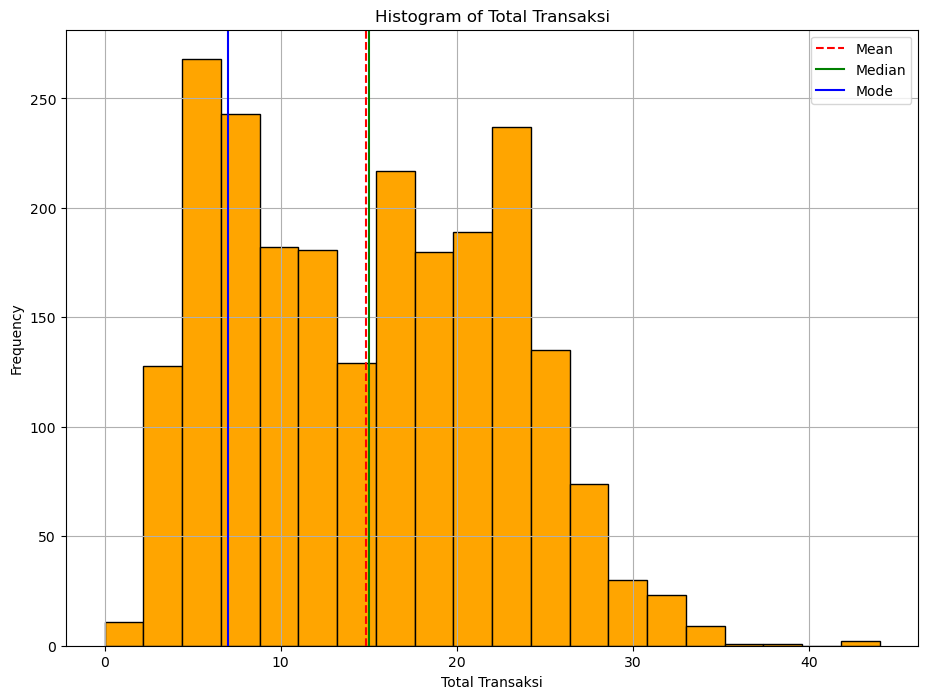

In [37]:
# Total Transaksi

mean=df['total_transaksi'].mean()
median=df['total_transaksi'].median()
mode=df['total_transaksi'].mode().values[0]

plt.figure(figsize=(11,8))
df['total_transaksi'].hist(bins=20, edgecolor='black',color='orange')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of Total Transaksi')
plt.xlabel('Total Transaksi')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### NumWebVisitsMonth

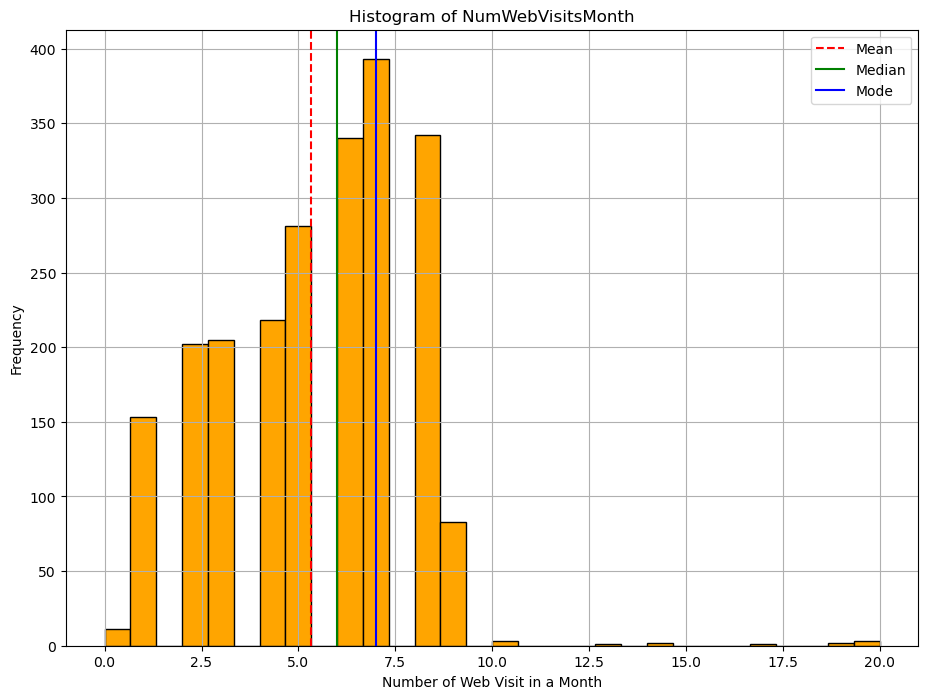

In [39]:
# NumWebVisitsMonth

mean=df['NumWebVisitsMonth'].mean()
median=df['NumWebVisitsMonth'].median()
mode=df['NumWebVisitsMonth'].mode().values[0]

plt.figure(figsize=(11,8))
df['NumWebVisitsMonth'].hist(bins=30, edgecolor='black', color='orange')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of NumWebVisitsMonth')
plt.xlabel('Number of Web Visit in a Month')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Z_CostContact

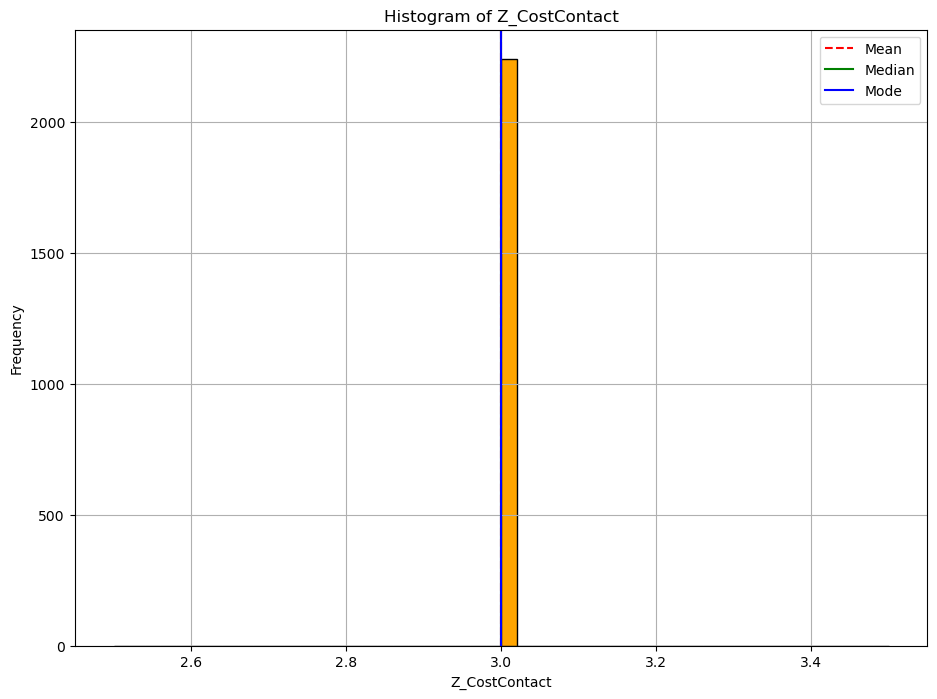

In [40]:
# Z_CostContact

mean=df['Z_CostContact'].mean()
median=df['Z_CostContact'].median()
mode=df['Z_CostContact'].mode().values[0]

plt.figure(figsize=(11,8))
df['Z_CostContact'].hist(bins=50, edgecolor='black',color='orange')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of Z_CostContact')
plt.xlabel('Z_CostContact')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Z_Revenue

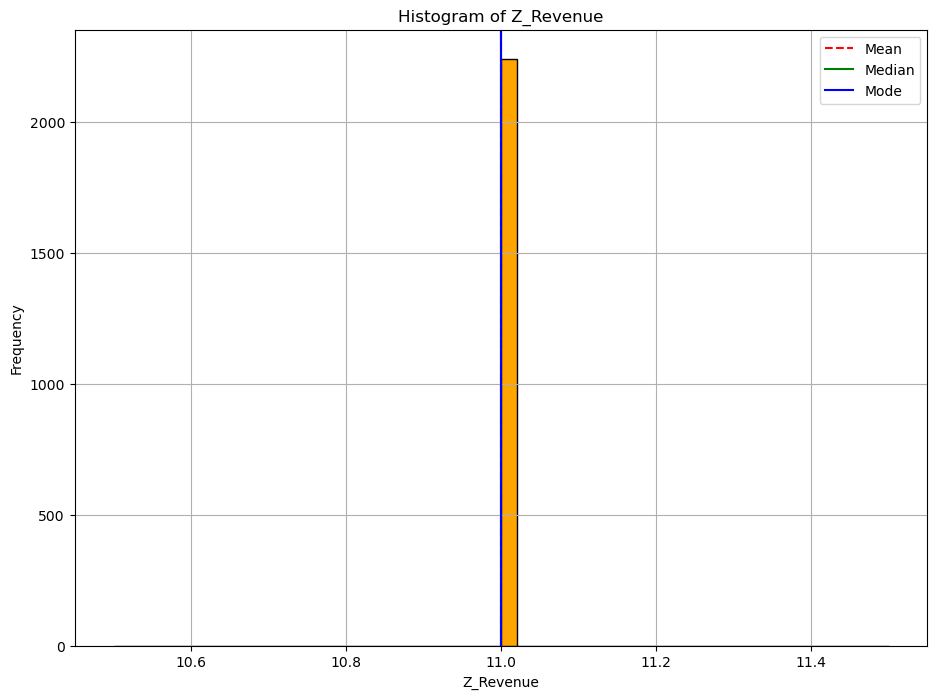

In [41]:
# Z_Revenue

mean=df['Z_Revenue'].mean()
median=df['Z_Revenue'].median()
mode=df['Z_Revenue'].mode().values[0]

plt.figure(figsize=(11,8))
df['Z_Revenue'].hist(bins=50, edgecolor='black', color='orange')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of Z_Revenue')
plt.xlabel('Z_Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Conversion Rate

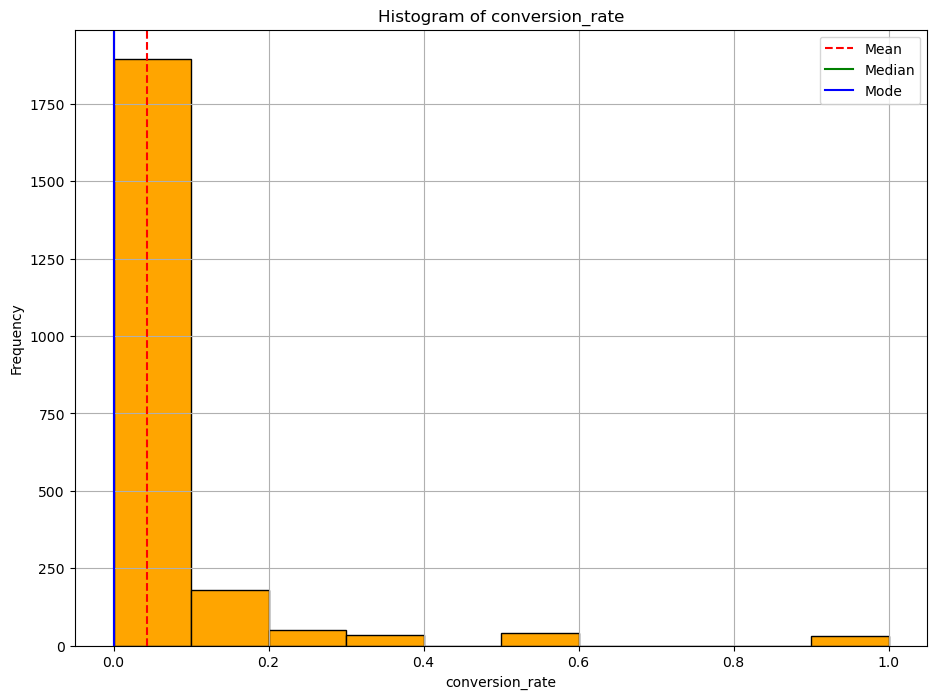

In [42]:
# Z_Revenue

mean=df['conversion_rate'].mean()
median=df['conversion_rate'].median()
mode=df['conversion_rate'].mode().values[0]

plt.figure(figsize=(11,8))
df['conversion_rate'].hist(bins=10, edgecolor='black', color='orange')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of conversion_rate')
plt.xlabel('conversion_rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Total Campaign Accepted

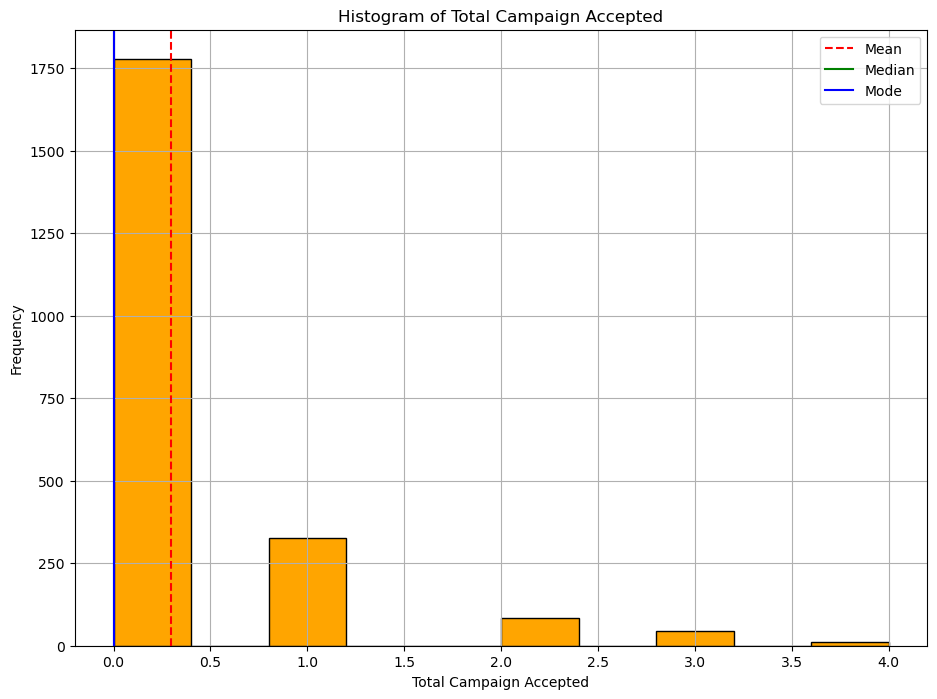

In [43]:
# Total Campaign Accepted

mean=df['total_acc_campaign'].mean()
median=df['total_acc_campaign'].median()
mode=df['total_acc_campaign'].mode().values[0]

plt.figure(figsize=(11,8))
df['total_acc_campaign'].hist(bins=10, edgecolor='black', color='orange')
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.title('Histogram of Total Campaign Accepted')
plt.xlabel('Total Campaign Accepted')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### b. Categorical

#### Age Group

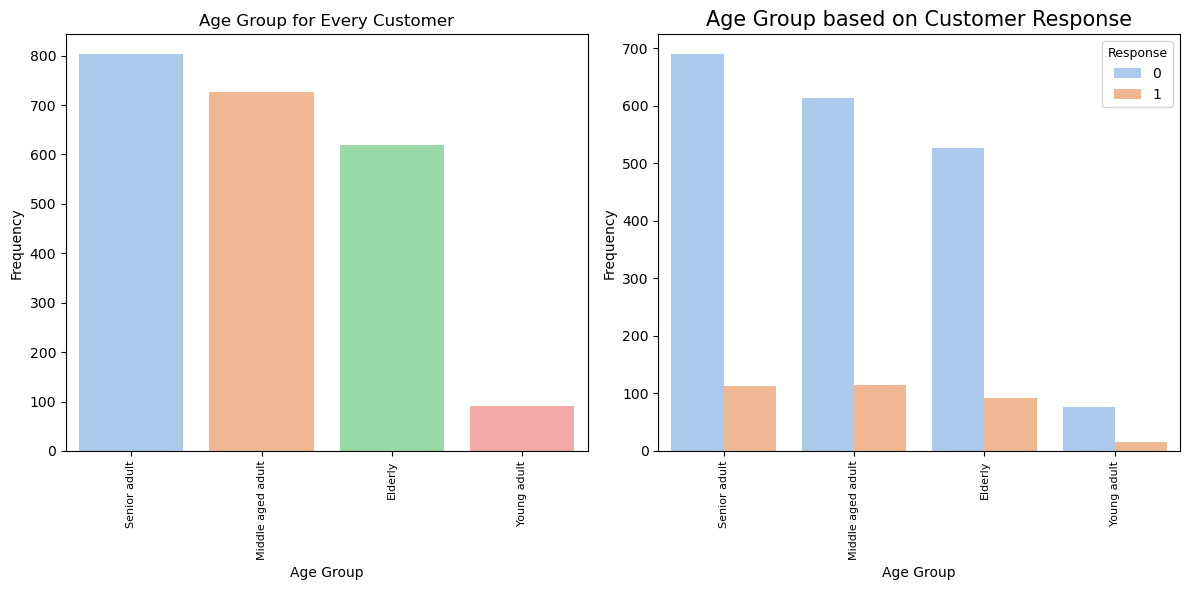

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='Age_Group', data=df, palette='pastel', order=df["Age_Group"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Age Group for Every Customer')

sns.countplot(x='Age_Group', data=df, hue='Response', palette='pastel', order=df["Age_Group"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Response', title_fontsize=9, loc='upper right')
axes[1].set_title('Age Group based on Customer Response', fontsize=15)

plt.tight_layout()

#### Education

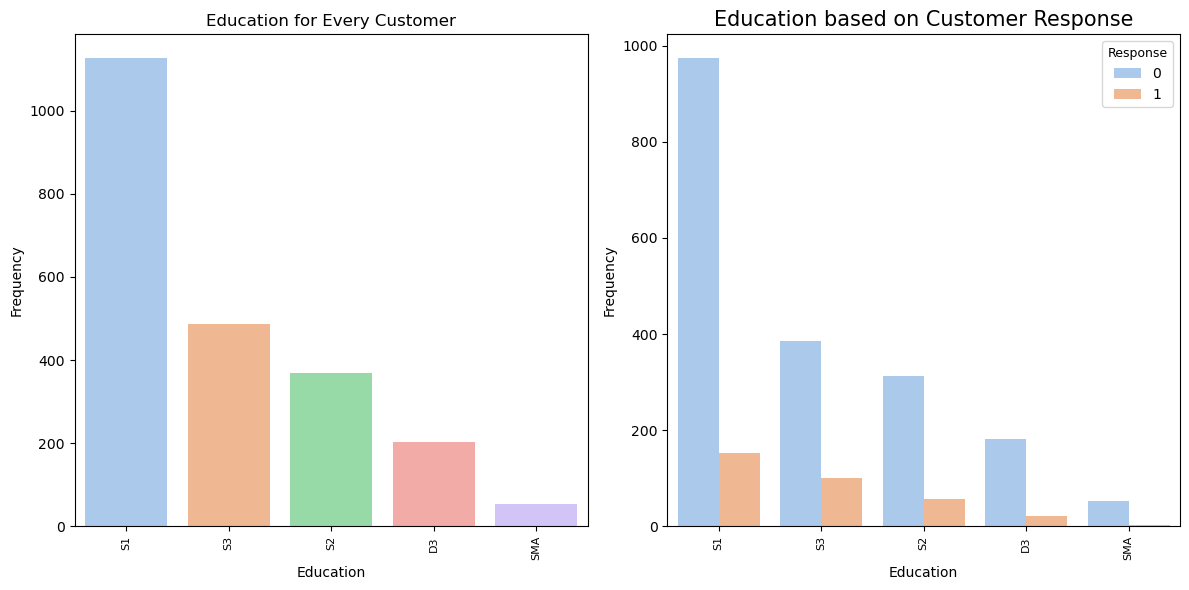

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='Education', data=df, palette='pastel', order=df["Education"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Education for Every Customer')

sns.countplot(x='Education', data=df, hue='Response', palette='pastel', order=df["Education"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Response', title_fontsize=9, loc='upper right')
axes[1].set_title('Education based on Customer Response', fontsize=15)

plt.tight_layout();

#### Marital_Status

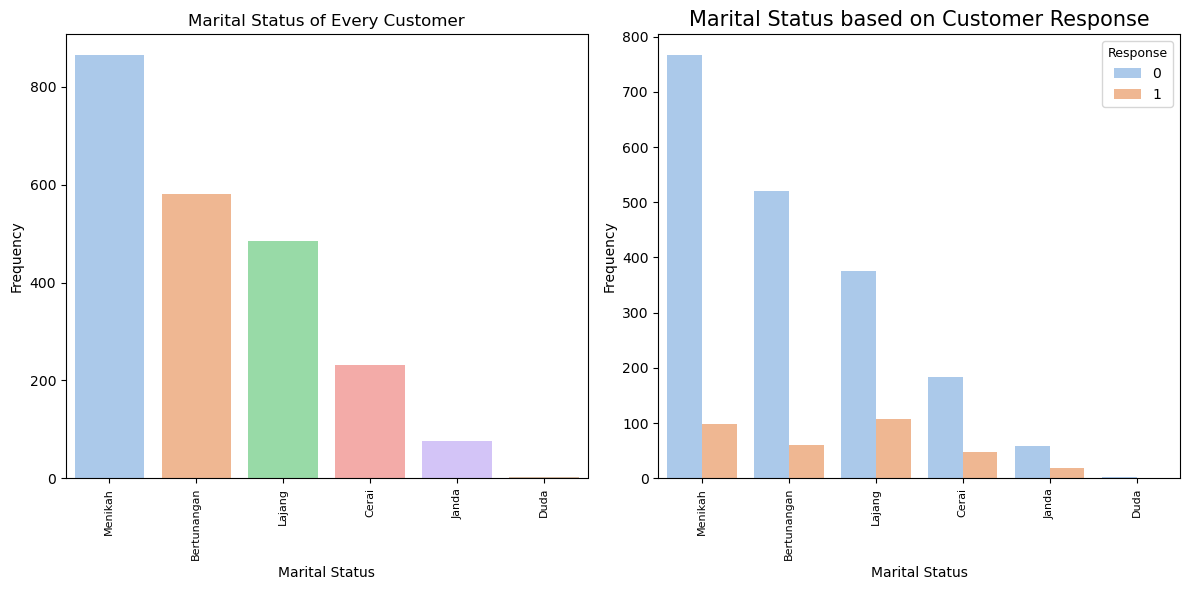

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='Marital_Status', data=df, palette='pastel', order=df["Marital_Status"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Marital Status of Every Customer')

sns.countplot(x='Marital_Status', data=df, hue='Response', palette='pastel', order=df["Marital_Status"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Response', title_fontsize=9, loc='upper right')
axes[1].set_title('Marital Status based on Customer Response', fontsize=15)

plt.tight_layout();

#### Complain

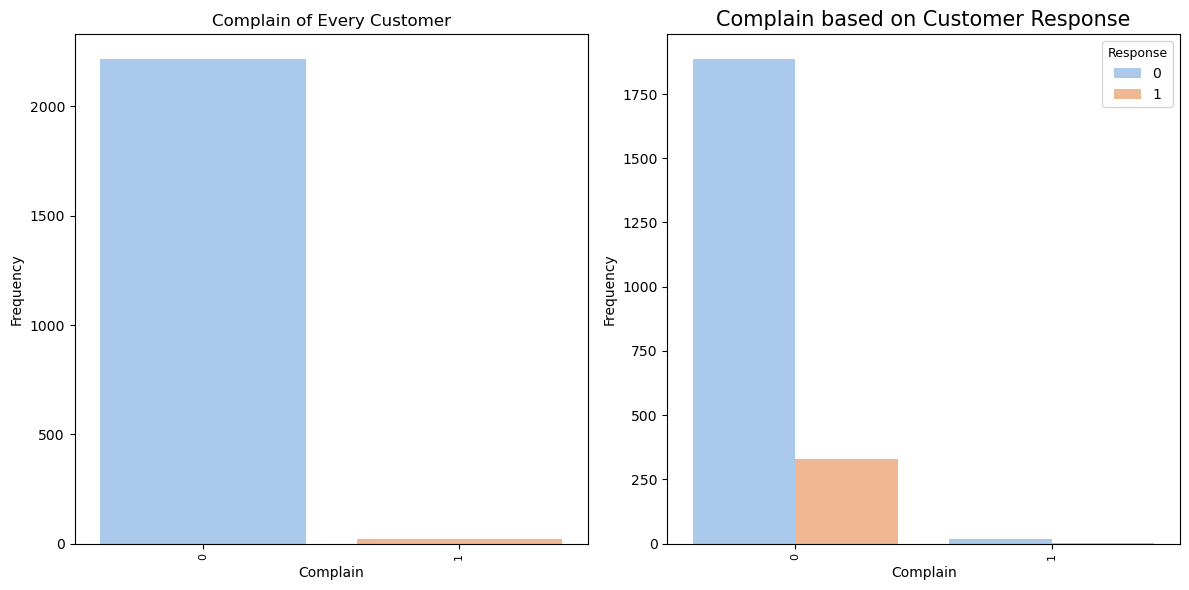

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='Complain', data=df, palette='pastel', order=df["Complain"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('Complain')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Complain of Every Customer')

sns.countplot(x='Complain', data=df, hue='Response', palette='pastel', order=df["Complain"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('Complain')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Response', title_fontsize=9, loc='upper right')
axes[1].set_title('Complain based on Customer Response', fontsize=15)

plt.tight_layout();

#### Response

Text(0.5, 1.0, 'Response for Every Customer')

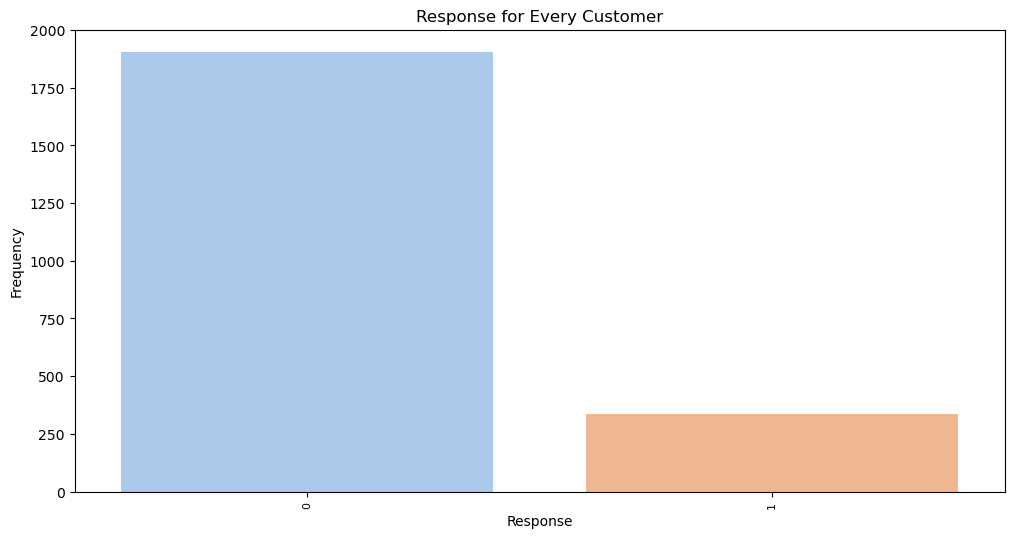

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(x='Response', data=df, palette='pastel', order=df["Response"].value_counts().index, ax=ax)
ax.set_xlabel('Response')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', which='major', labelsize=8)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Response for Every Customer')

#### AcceptedCmp1

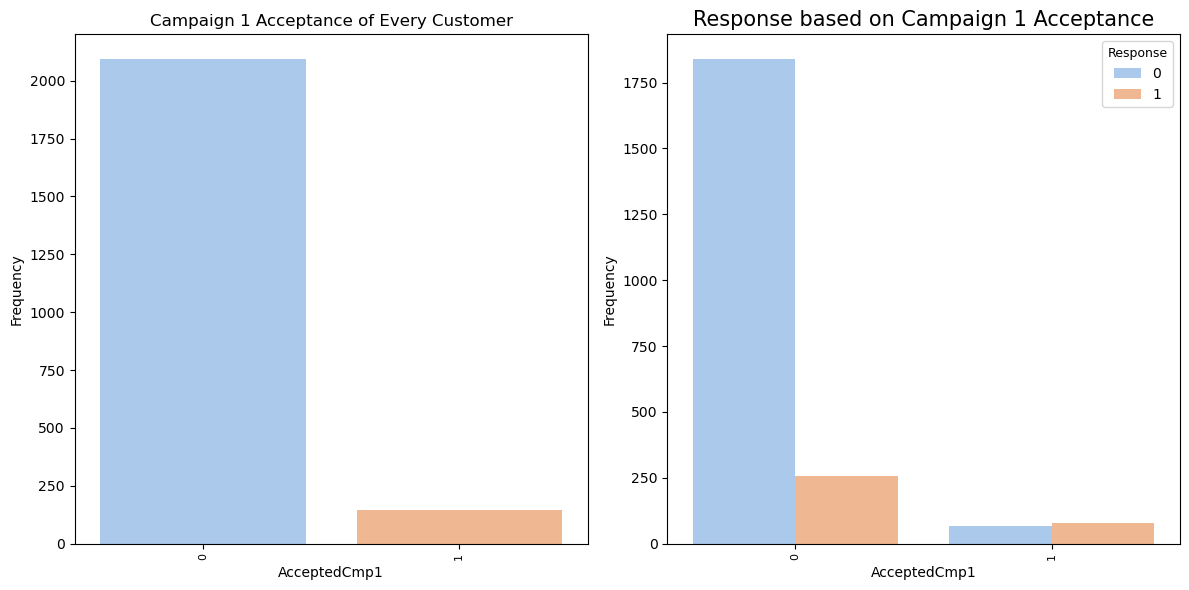

In [52]:
#AcceptedCmp1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='AcceptedCmp1', data=df, palette='pastel', order=df["AcceptedCmp1"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('AcceptedCmp1')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Campaign 1 Acceptance of Every Customer')

sns.countplot(x='AcceptedCmp1', data=df, hue='Response', palette='pastel', order=df["AcceptedCmp1"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('AcceptedCmp1')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Response', title_fontsize=9, loc='upper right')
axes[1].set_title('Response based on Campaign 1 Acceptance', fontsize=15)

plt.tight_layout()

#### AcceptedCmp2

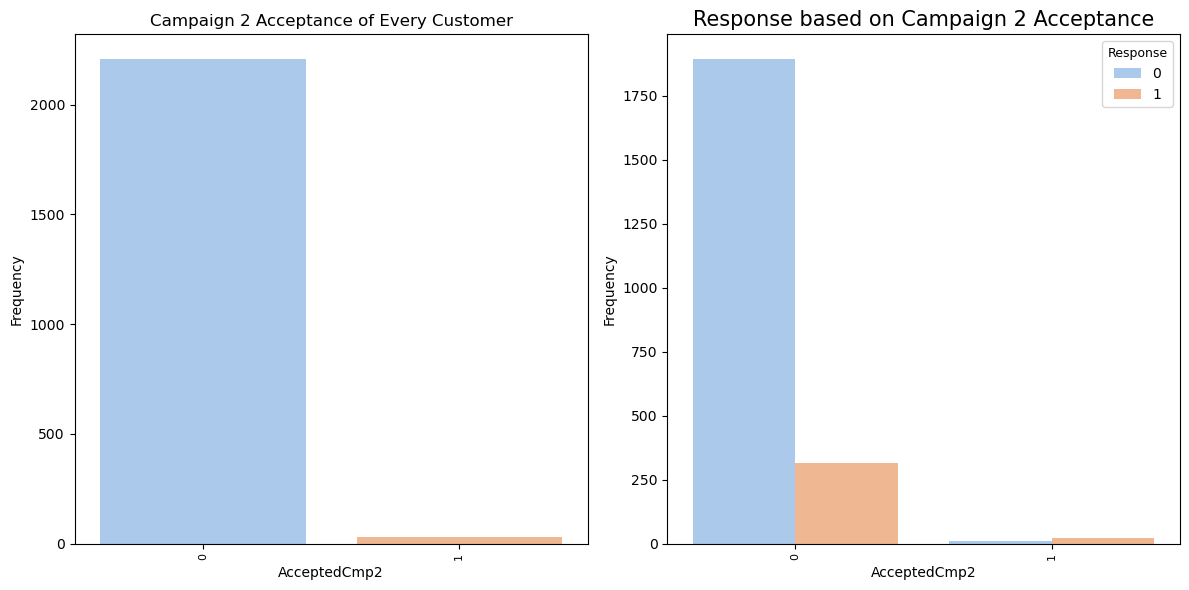

In [53]:
#AcceptedCmp2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='AcceptedCmp2', data=df, palette='pastel', order=df["AcceptedCmp2"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('AcceptedCmp2')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Campaign 2 Acceptance of Every Customer')

sns.countplot(x='AcceptedCmp2', data=df, hue='Response', palette='pastel', order=df["AcceptedCmp2"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('AcceptedCmp2')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Response', title_fontsize=9, loc='upper right')
axes[1].set_title('Response based on Campaign 2 Acceptance', fontsize=15)

plt.tight_layout();

#### AcceptedCmp3

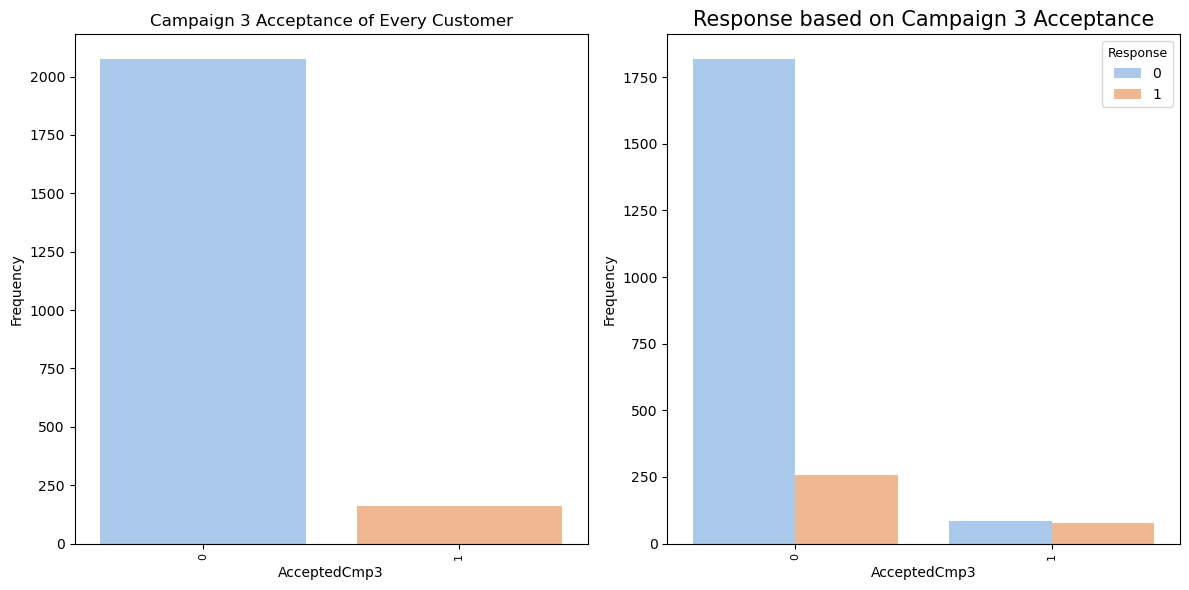

In [54]:
#AcceptedCmp3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='AcceptedCmp3', data=df, palette='pastel', order=df["AcceptedCmp3"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('AcceptedCmp3')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Campaign 3 Acceptance of Every Customer')

sns.countplot(x='AcceptedCmp3', data=df, hue='Response', palette='pastel', order=df["AcceptedCmp3"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('AcceptedCmp3')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Response', title_fontsize=9, loc='upper right')
axes[1].set_title('Response based on Campaign 3 Acceptance', fontsize=15)

plt.tight_layout()

#### AcceptedCmp4

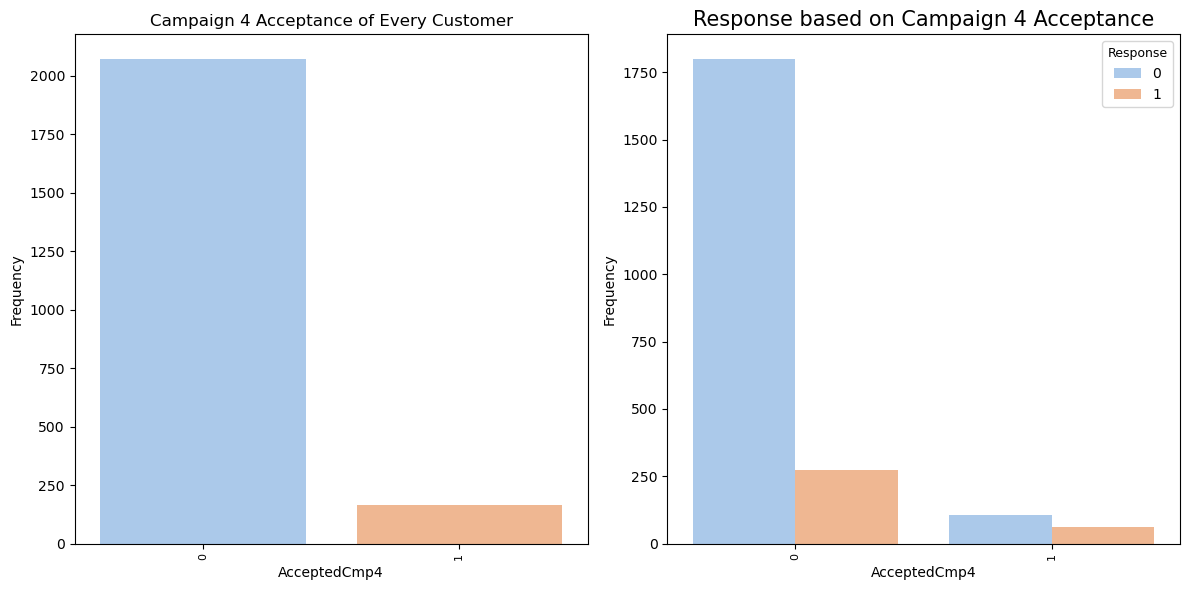

In [55]:
#AcceptedCmp4
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='AcceptedCmp4', data=df, palette='pastel', order=df["AcceptedCmp4"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('AcceptedCmp4')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Campaign 4 Acceptance of Every Customer')

sns.countplot(x='AcceptedCmp4', data=df, hue='Response', palette='pastel', order=df["AcceptedCmp4"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('AcceptedCmp4')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Response', title_fontsize=9, loc='upper right')
axes[1].set_title('Response based on Campaign 4 Acceptance', fontsize=15)

plt.tight_layout()

#### AcceptedCmp5

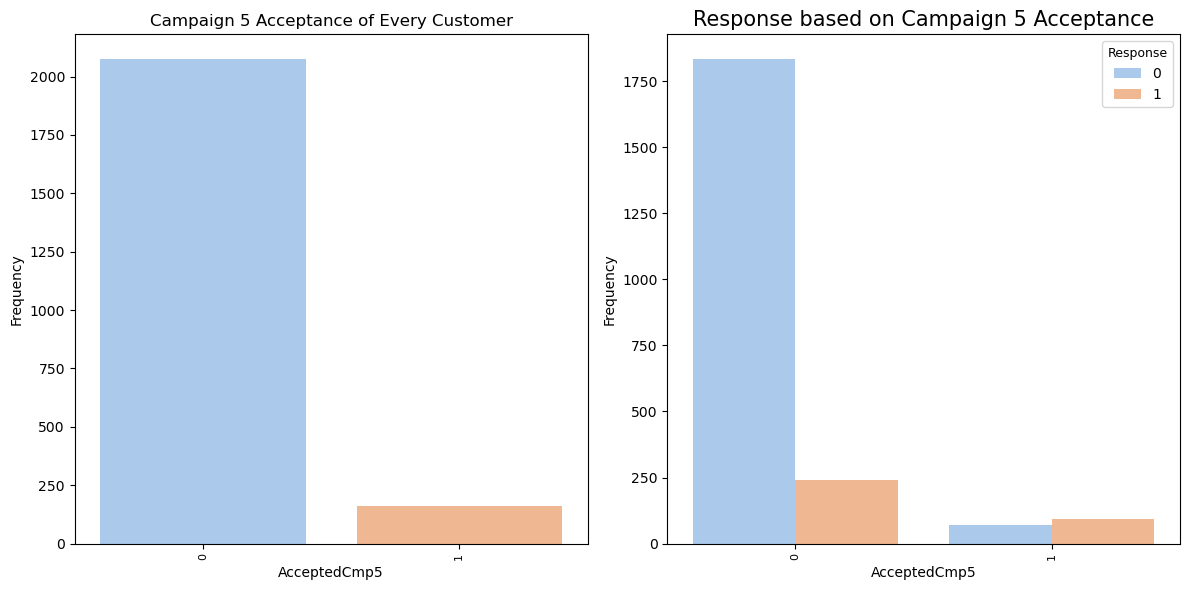

In [56]:
#AcceptedCmp5
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='AcceptedCmp5', data=df, palette='pastel', order=df["AcceptedCmp5"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('AcceptedCmp5')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Campaign 5 Acceptance of Every Customer')

sns.countplot(x='AcceptedCmp5', data=df, hue='Response', palette='pastel', order=df["AcceptedCmp5"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('AcceptedCmp5')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Response', title_fontsize=9, loc='upper right')
axes[1].set_title('Response based on Campaign 5 Acceptance', fontsize=15)

plt.tight_layout()

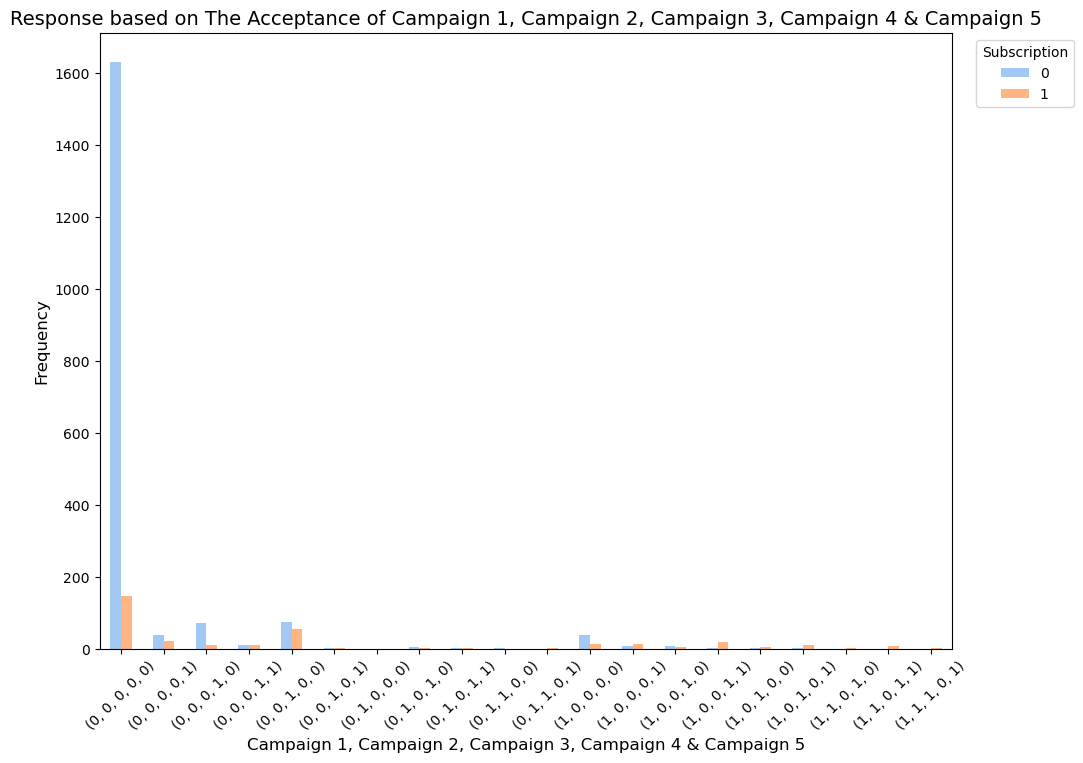

In [57]:
grouped = df.groupby(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Response']).size().reset_index(name='count')
grouped = grouped.pivot_table(index=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5'], columns='Response', values='count', aggfunc='sum', fill_value=0)

grouped.plot(kind='bar', figsize=(11, 8), color=sns.color_palette("pastel"))
plt.xlabel('Campaign 1, Campaign 2, Campaign 3, Campaign 4 & Campaign 5', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Response based on The Acceptance of Campaign 1, Campaign 2, Campaign 3, Campaign 4 & Campaign 5', fontsize=14)
plt.legend(title='Subscription', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.xticks(rotation=45)
plt.show()


## Bivariate Analysis

### a. Numerical

#### Income & Conversion Rate

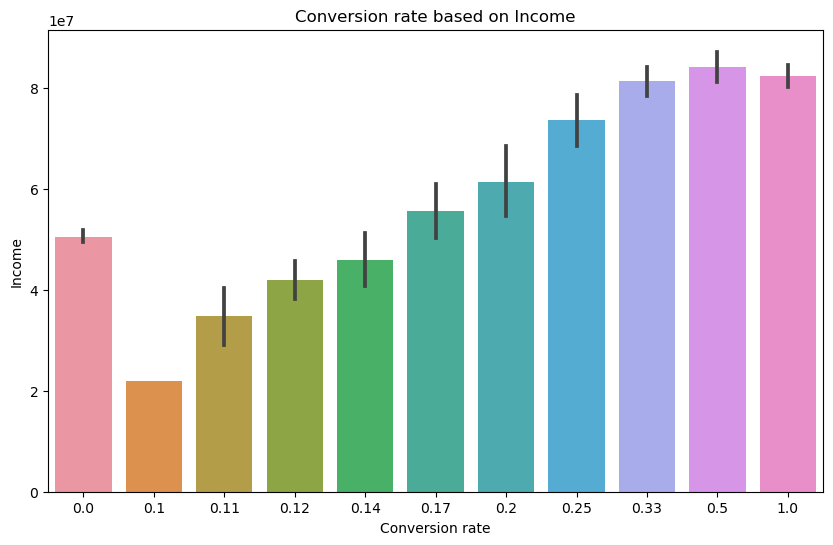

In [58]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='Income', data=df)
plt.title('Conversion rate based on Income')
plt.xlabel('Conversion rate')
plt.ylabel('Income')
plt.show()

#### Income & Response

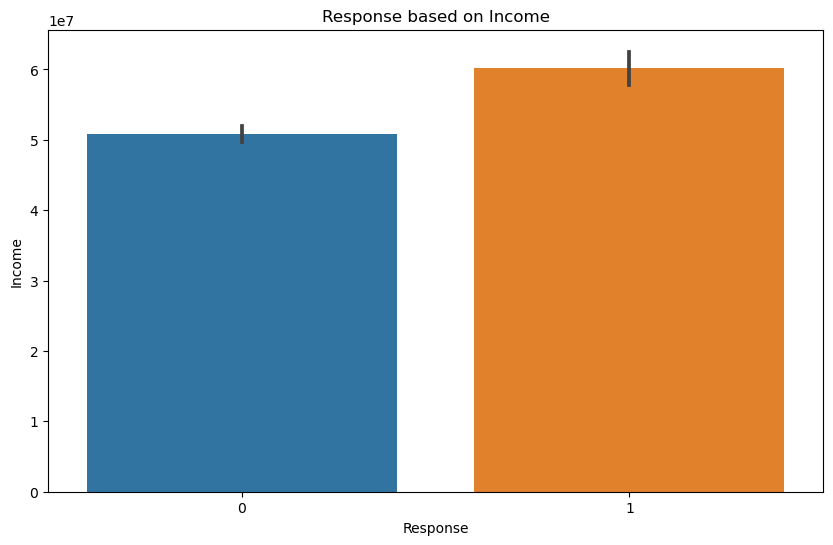

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='Income', data=df)
plt.title('Response based on Income')
plt.xlabel('Response')
plt.ylabel('Income')
plt.show()

#### Age & Conversion Rate

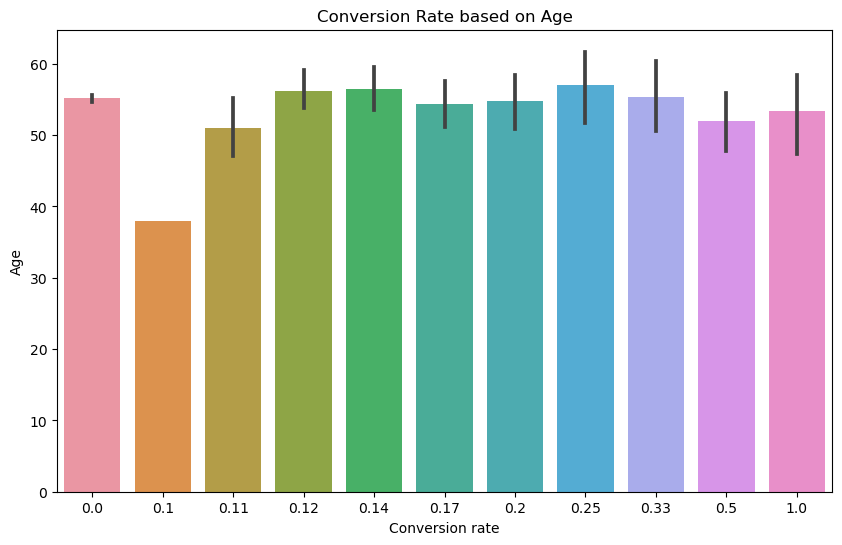

In [61]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='Age', data=df)
plt.title('Conversion Rate based on Age')
plt.xlabel('Conversion rate')
plt.ylabel('Age')
plt.show()

#### Age & Response

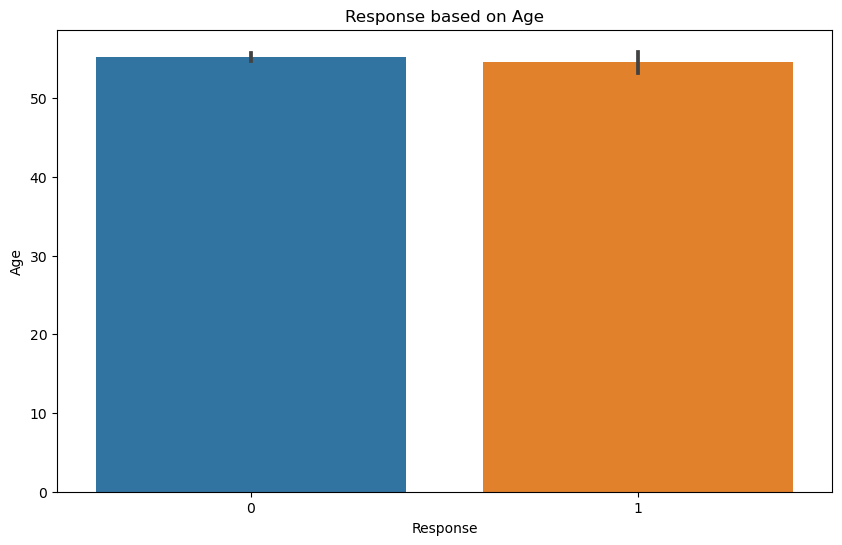

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='Age', data=df)
plt.title('Response based on Age')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

#### Kidhome & Conversion Rate

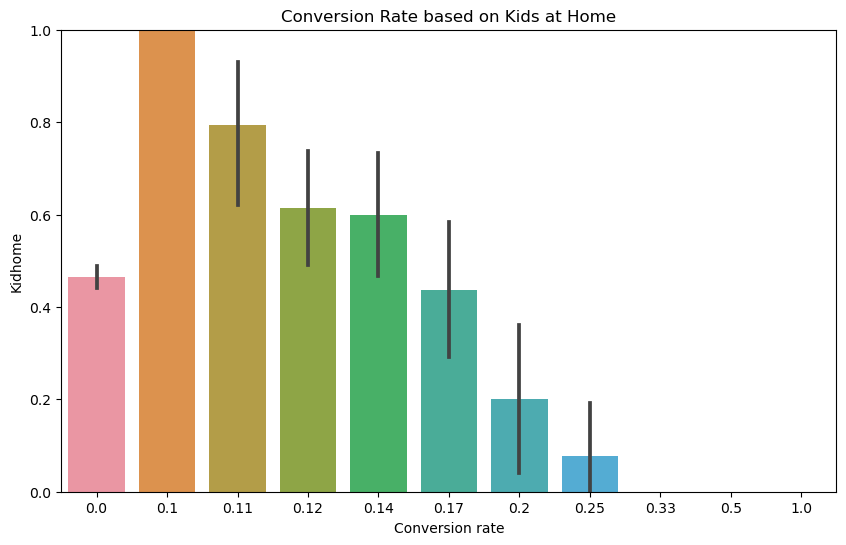

In [63]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='Kidhome', data=df)
plt.title('Conversion Rate based on Kids at Home')
plt.xlabel('Conversion rate')
plt.ylabel('Kidhome')
plt.ylim(0,1)
plt.show()

#### Kidhome & Response

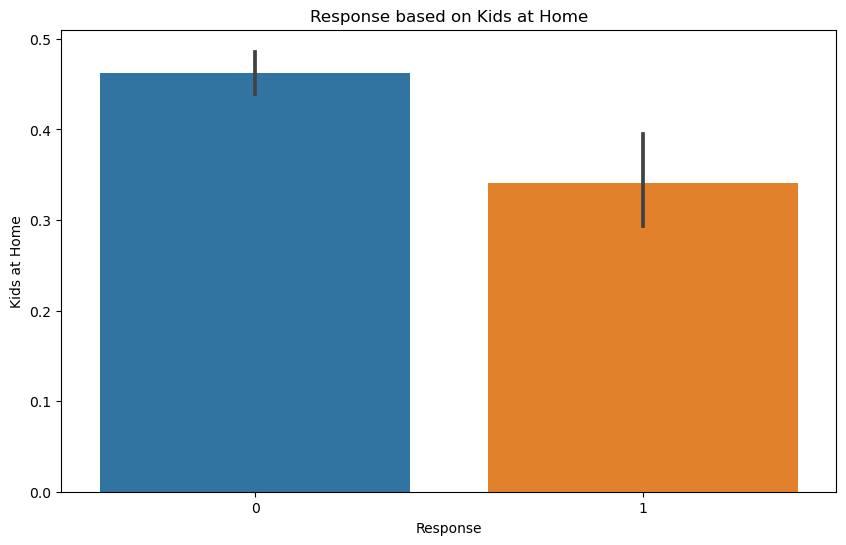

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='Kidhome', data=df)
plt.title('Response based on Kids at Home')
plt.xlabel('Response')
plt.ylabel('Kids at Home')
plt.show()

#### Jumlah Anak & Conversion Rate

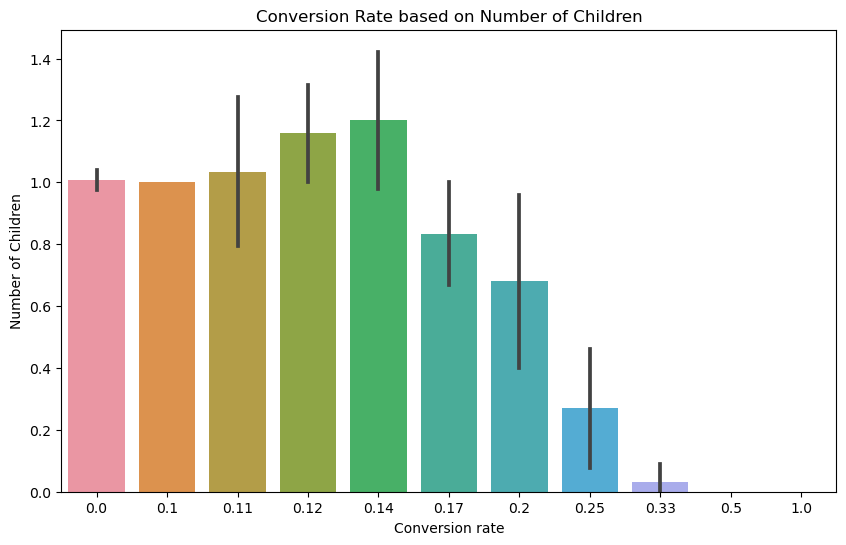

In [65]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='jumlah_anak', data=df)
plt.title('Conversion Rate based on Number of Children')
plt.xlabel('Conversion rate')
plt.ylabel('Number of Children')
plt.show()

#### Jumlah Anak & Response

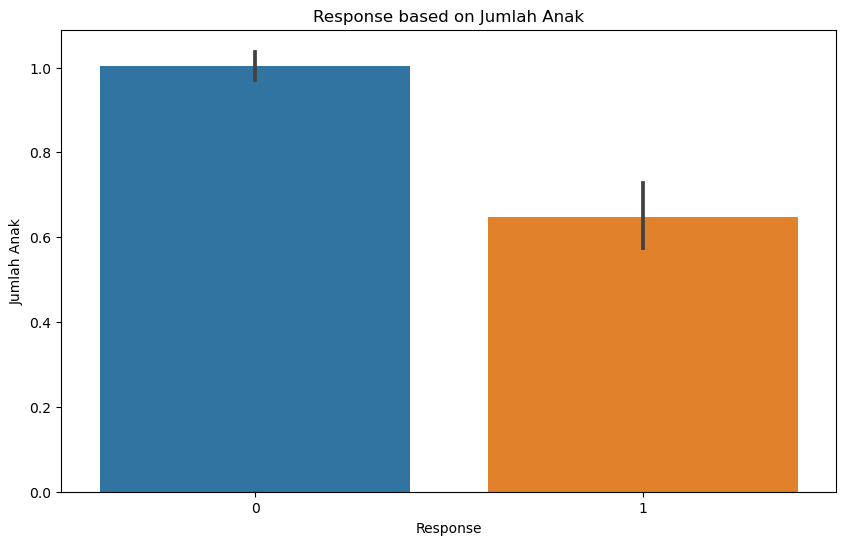

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='jumlah_anak', data=df)
plt.title('Response based on Jumlah Anak')
plt.xlabel('Response')
plt.ylabel('Jumlah Anak')
plt.show()

#### Teenhome & Conversion Rate 

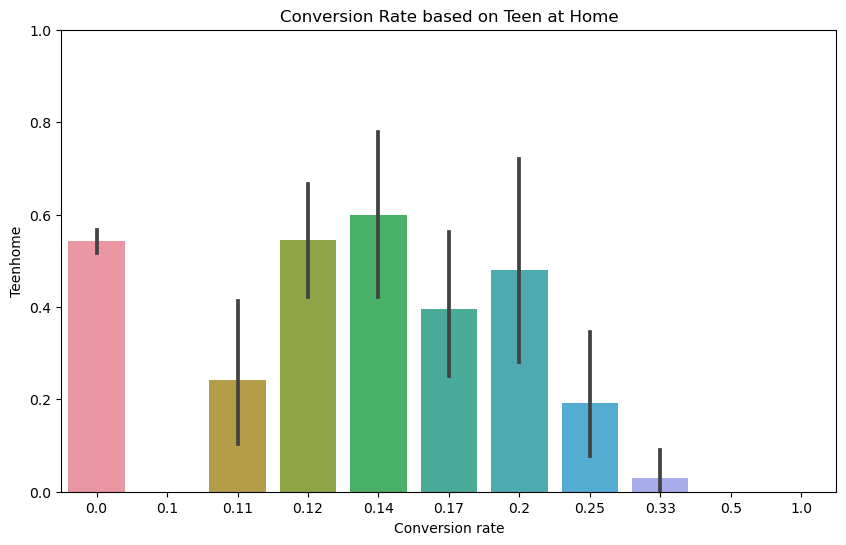

In [67]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='Teenhome', data=df)
plt.title('Conversion Rate based on Teen at Home')
plt.xlabel('Conversion rate')
plt.ylabel('Teenhome')
plt.ylim(0,1)
plt.show()

#### Teenhome & Response

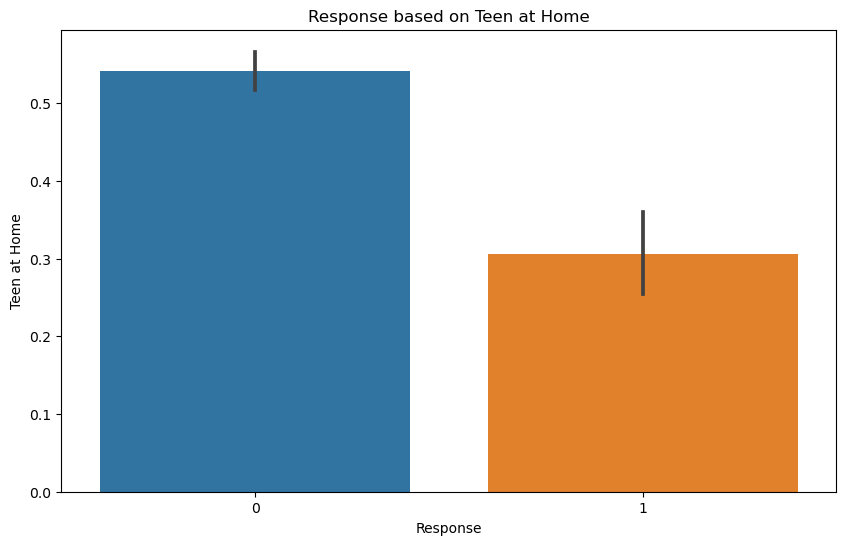

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='Teenhome', data=df)
plt.title('Response based on Teen at Home')
plt.xlabel('Response')
plt.ylabel('Teen at Home')
plt.show()

#### NumDealsPurchases & Conversion Rate 

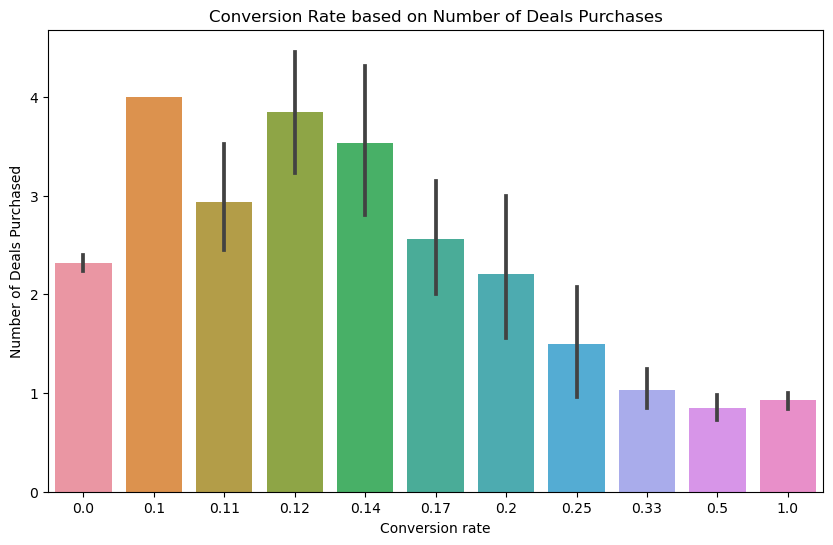

In [69]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='NumDealsPurchases', data=df)
plt.title('Conversion Rate based on Number of Deals Purchases')
plt.xlabel('Conversion rate')
plt.ylabel('Number of Deals Purchased')
plt.show()

#### NumDealsPurchases & Response

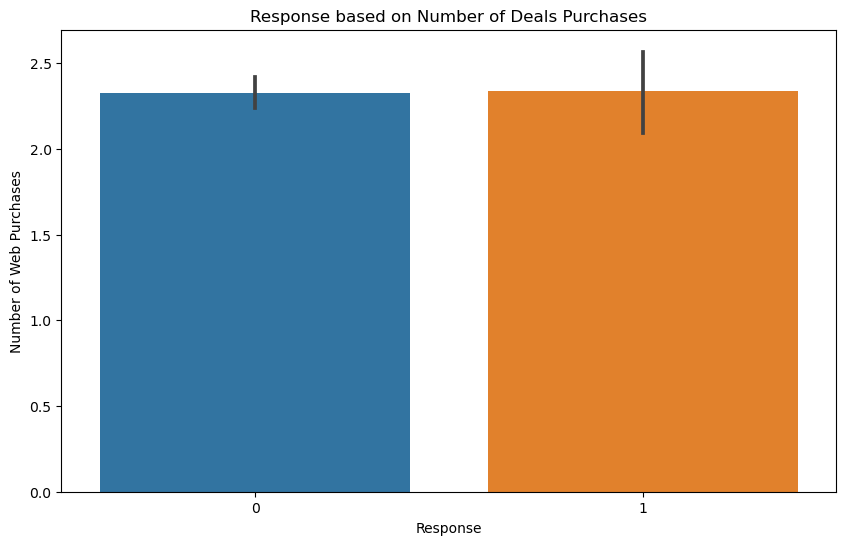

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='NumDealsPurchases', data=df)
plt.title('Response based on Number of Deals Purchases')
plt.xlabel('Response')
plt.ylabel('Number of Web Purchases')
plt.show()

#### NumWebPurchases & Conversion Rate 

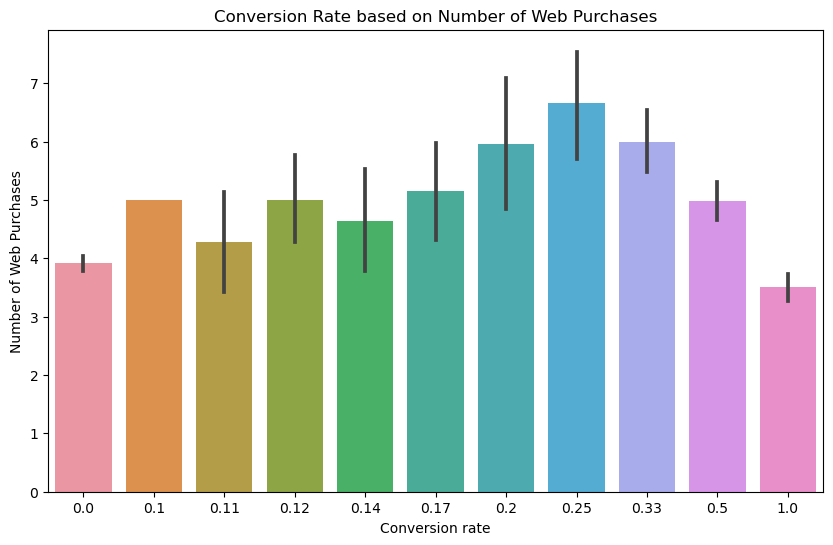

In [71]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='NumWebPurchases', data=df)
plt.title('Conversion Rate based on Number of Web Purchases')
plt.xlabel('Conversion rate')
plt.ylabel('Number of Web Purchases')
plt.show()

#### NumWebPurchases & Response

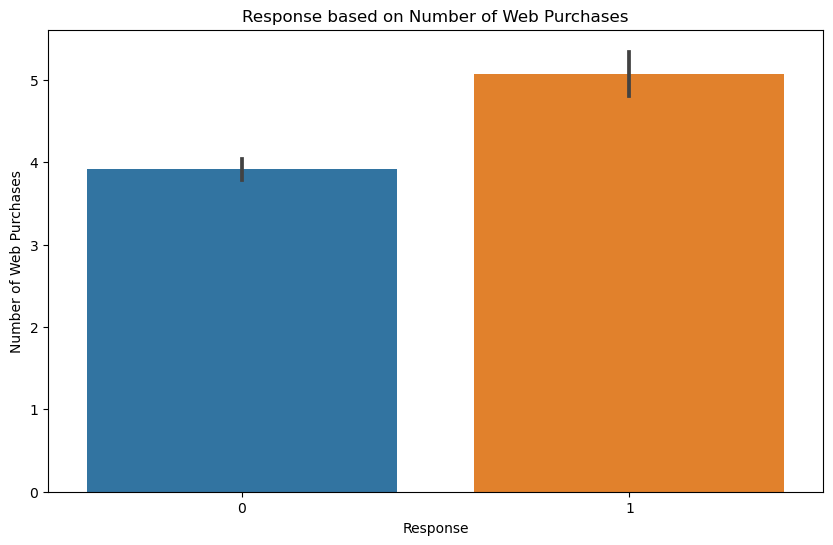

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='NumWebPurchases', data=df)
plt.title('Response based on Number of Web Purchases')
plt.xlabel('Response')
plt.ylabel('Number of Web Purchases')
plt.show()

#### NumCatalogPurchases & Conversion Rate

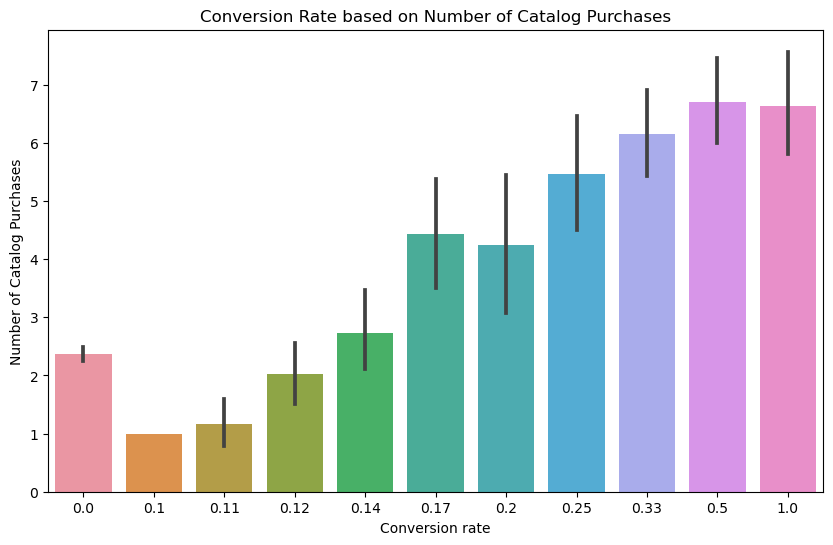

In [73]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='NumCatalogPurchases', data=df)
plt.title('Conversion Rate based on Number of Catalog Purchases')
plt.xlabel('Conversion rate')
plt.ylabel('Number of Catalog Purchases')
plt.show()

#### NumCatalogPurchases & Response

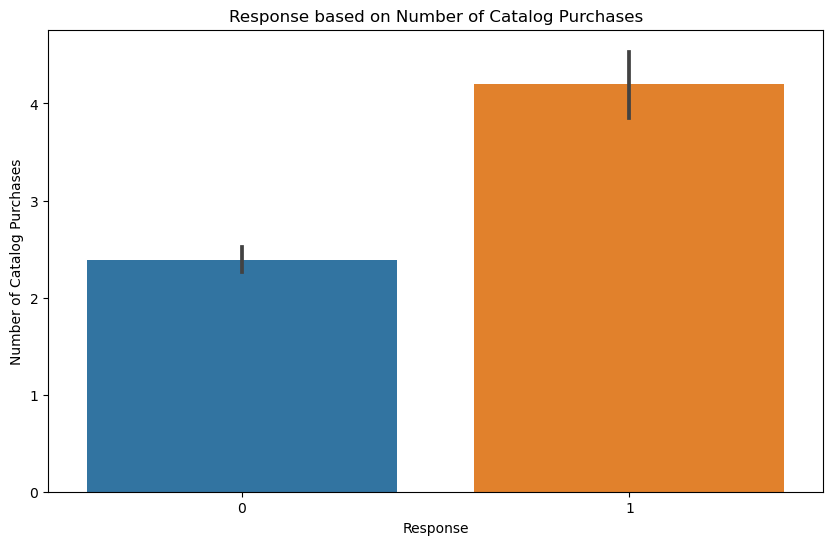

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='NumCatalogPurchases', data=df)
plt.title('Response based on Number of Catalog Purchases')
plt.xlabel('Response')
plt.ylabel('Number of Catalog Purchases')
plt.show()

#### NumStorePurchases & Conversion Rate

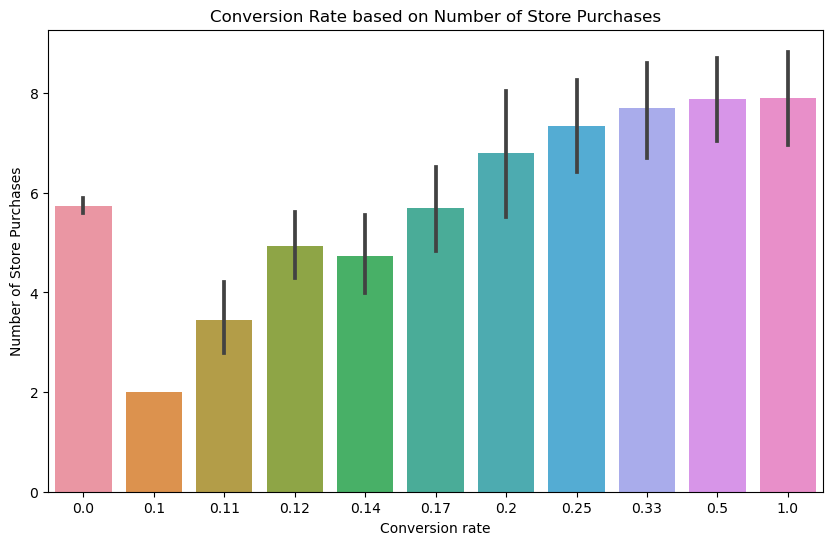

In [75]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='NumStorePurchases', data=df)
plt.title('Conversion Rate based on Number of Store Purchases')
plt.xlabel('Conversion rate')
plt.ylabel('Number of Store Purchases')
plt.show()

#### NumStorePurchases & Response

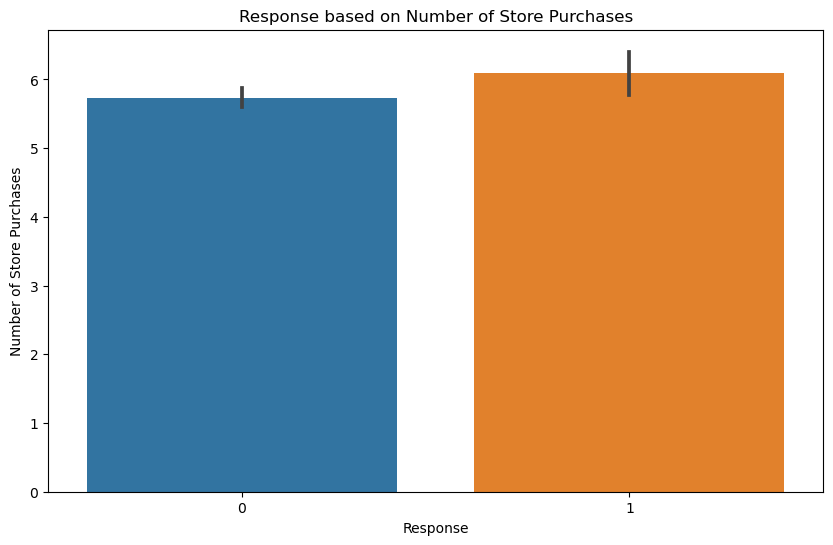

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='NumStorePurchases', data=df)
plt.title('Response based on Number of Store Purchases')
plt.xlabel('Response')
plt.ylabel('Number of Store Purchases')
plt.show()

#### total_transaksi & Conversion rate

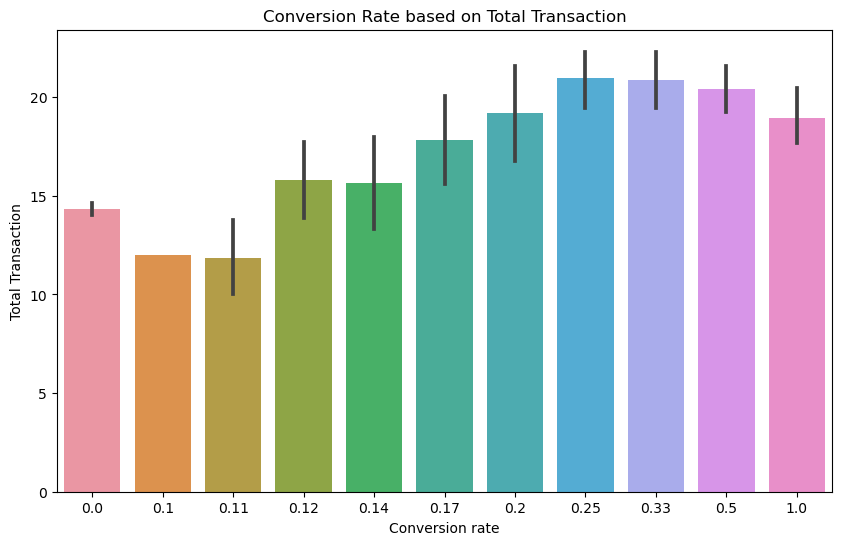

In [77]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='total_transaksi', data=df)
plt.title('Conversion Rate based on Total Transaction')
plt.xlabel('Conversion rate')
plt.ylabel('Total Transaction')
plt.show()

#### total_transaksi & Response

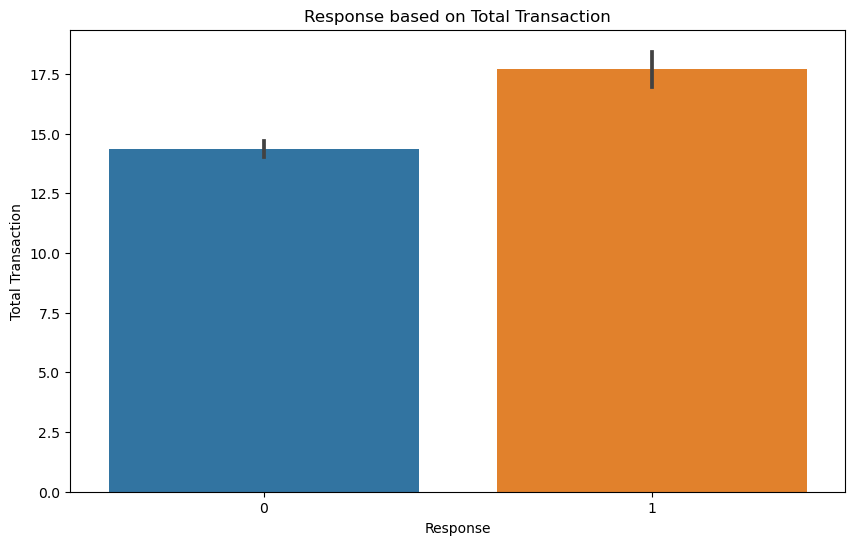

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='total_transaksi', data=df)
plt.title('Response based on Total Transaction')
plt.xlabel('Response')
plt.ylabel('Total Transaction')
plt.show()

#### total_pengeluaran & Conversion Rate

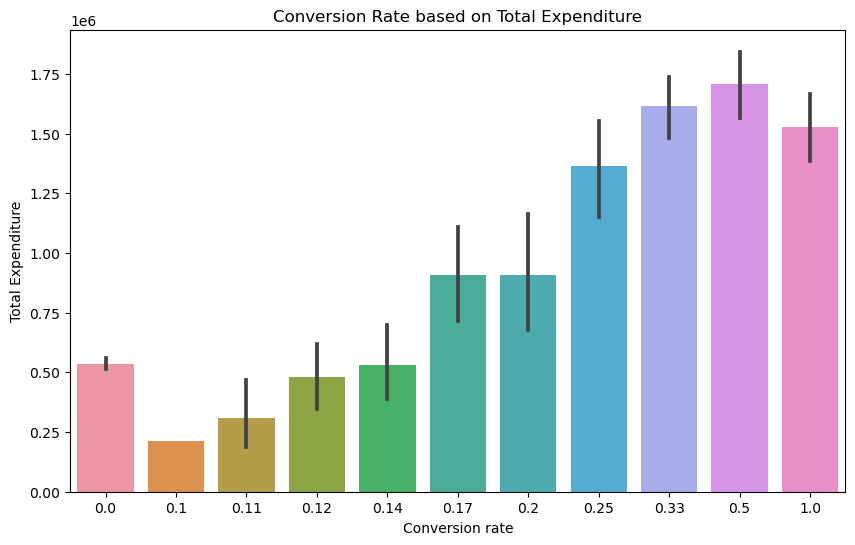

In [79]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='total_pengeluaran', data=df)
plt.title('Conversion Rate based on Total Expenditure')
plt.xlabel('Conversion rate')
plt.ylabel('Total Expenditure')
plt.show()

#### total_pengeluaran & Response

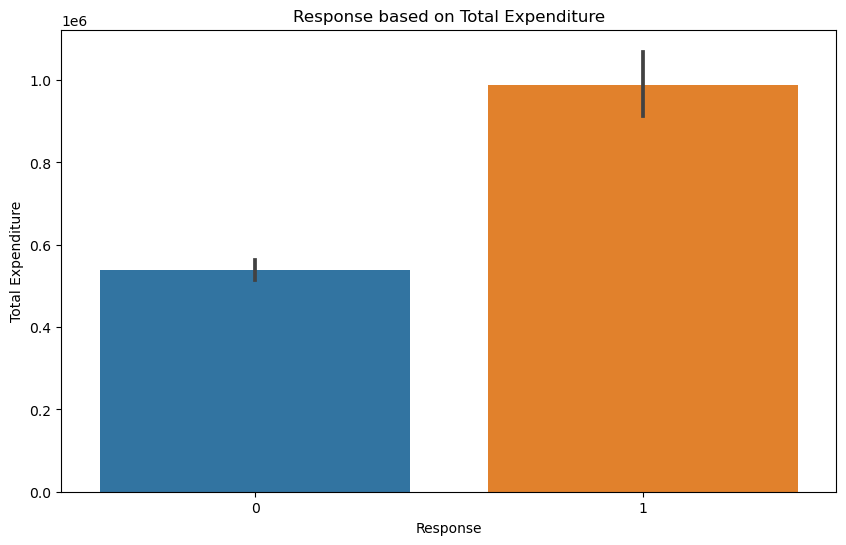

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='total_pengeluaran', data=df)
plt.title('Response based on Total Expenditure')
plt.xlabel('Response')
plt.ylabel('Total Expenditure')
plt.show()

#### NumWebVisitsMonth & Conversion Rate

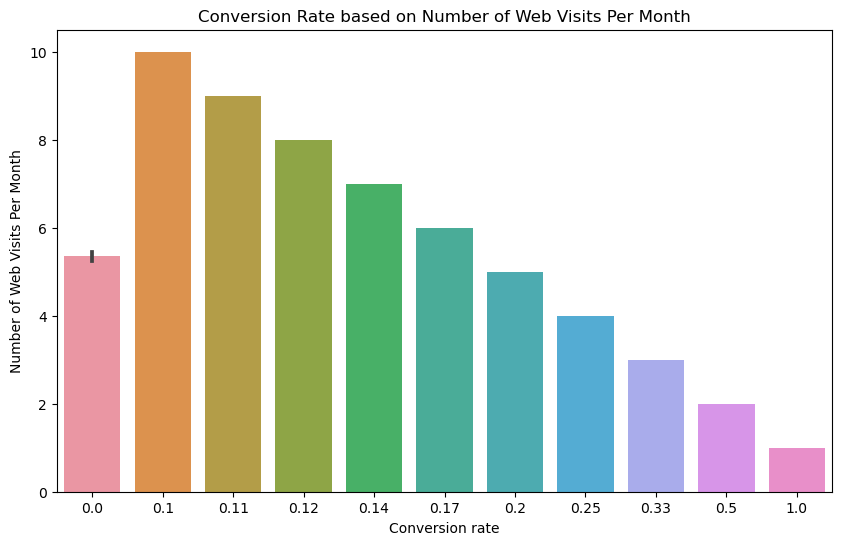

In [81]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='NumWebVisitsMonth', data=df)
plt.title('Conversion Rate based on Number of Web Visits Per Month')
plt.xlabel('Conversion rate')
plt.ylabel('Number of Web Visits Per Month')
plt.show()

#### NumWebVisitsMonth & Response

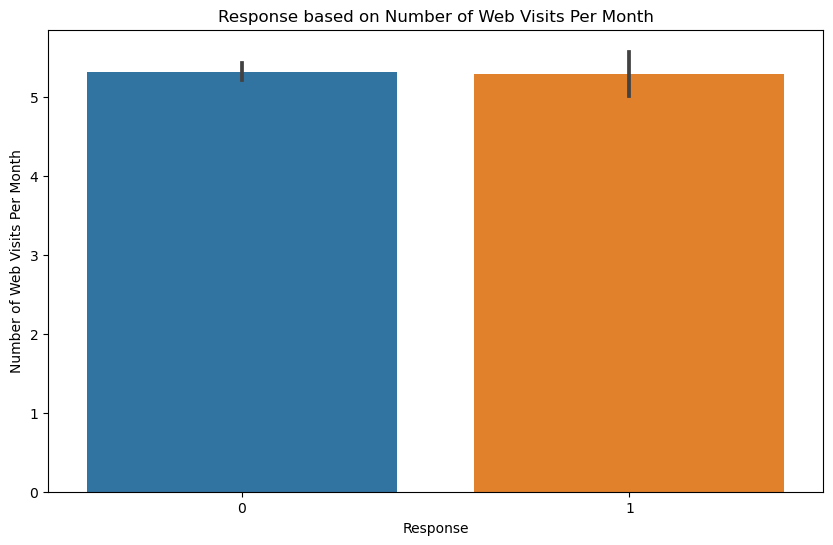

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='NumWebVisitsMonth', data=df)
plt.title('Response based on Number of Web Visits Per Month')
plt.xlabel('Response')
plt.ylabel('Number of Web Visits Per Month')
plt.show()

#### Recency & Conversion Rate

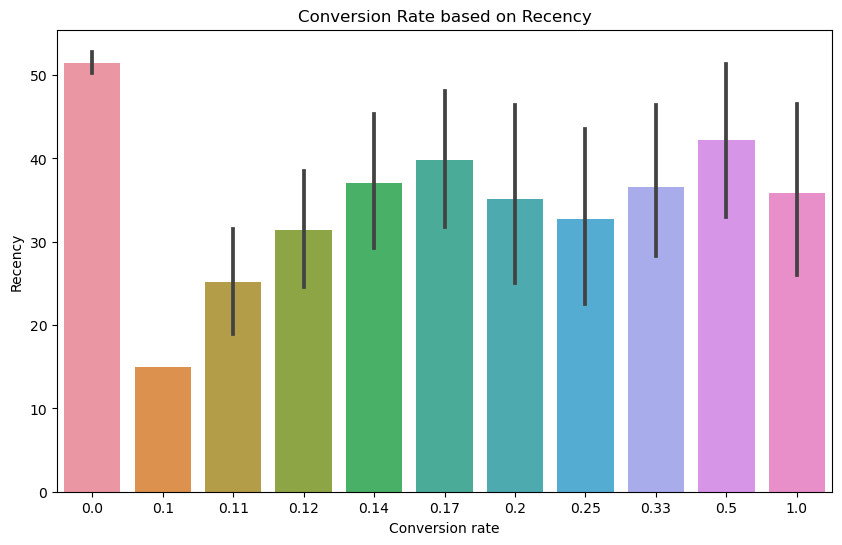

In [83]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='Recency', data=df)
plt.title('Conversion Rate based on Recency')
plt.xlabel('Conversion rate')
plt.ylabel('Recency')
plt.show()

#### Recency & Response

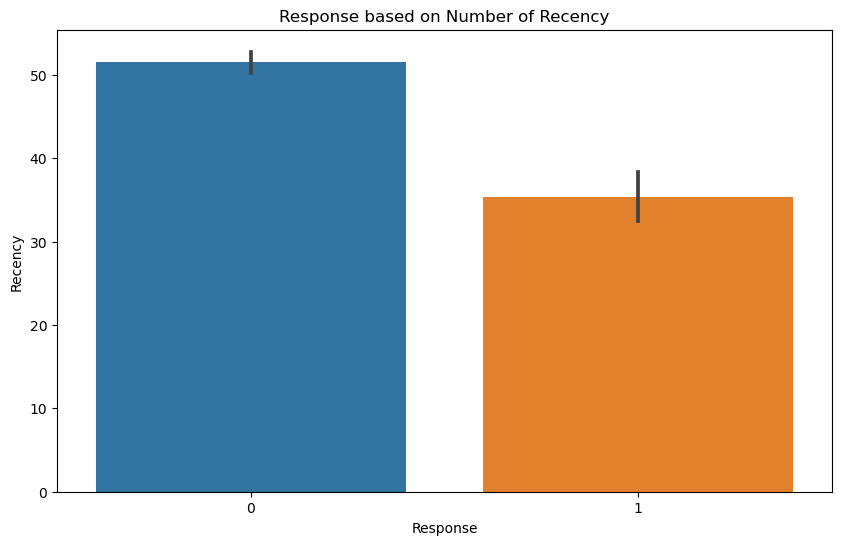

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='Recency', data=df)
plt.title('Response based on Number of Recency')
plt.xlabel('Response')
plt.ylabel('Recency')
plt.show()

#### MntCoke & Conversion Rate

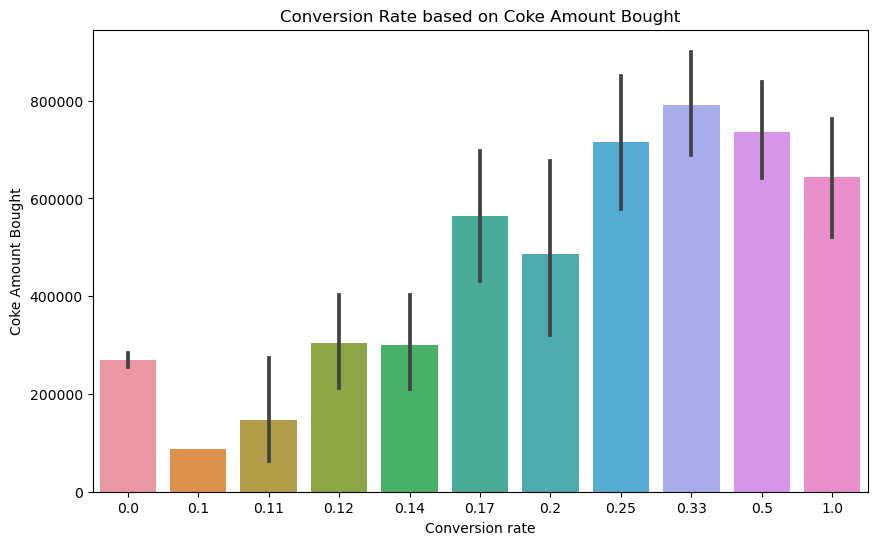

In [85]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='MntCoke', data=df)
plt.title('Conversion Rate based on Coke Amount Bought')
plt.xlabel('Conversion rate')
plt.ylabel('Coke Amount Bought')
plt.show()

#### MntCoke & Response

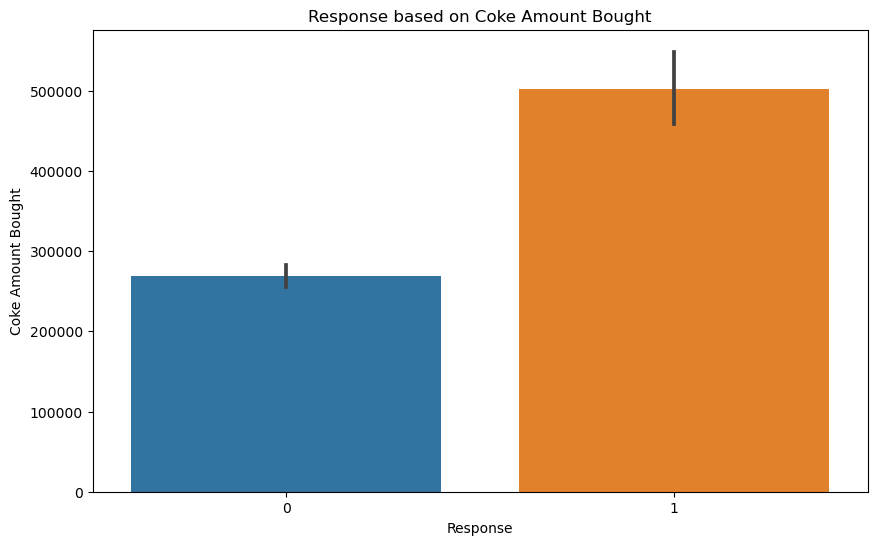

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='MntCoke', data=df)
plt.title('Response based on Coke Amount Bought')
plt.xlabel('Response')
plt.ylabel('Coke Amount Bought')
plt.show()

#### MntFruits & Conversion Rate

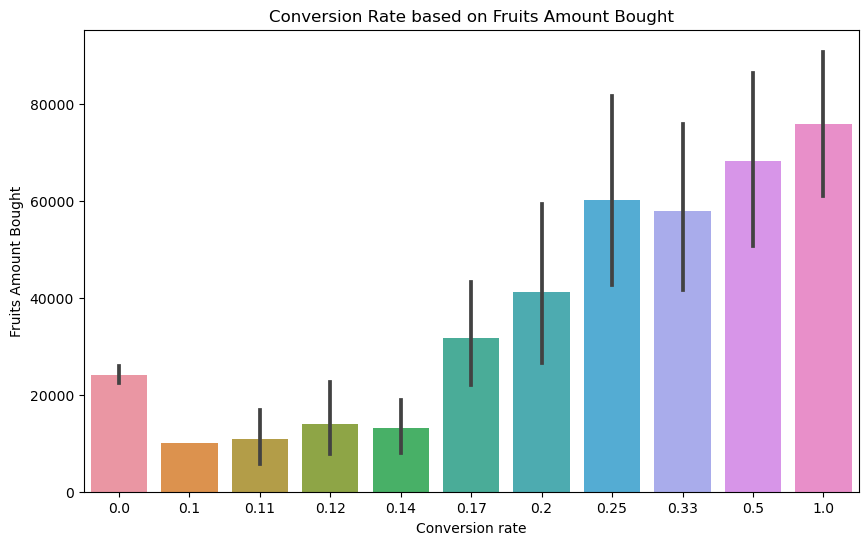

In [87]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='MntFruits', data=df)
plt.title('Conversion Rate based on Fruits Amount Bought')
plt.xlabel('Conversion rate')
plt.ylabel('Fruits Amount Bought')
plt.show()

#### MntFruits & Response

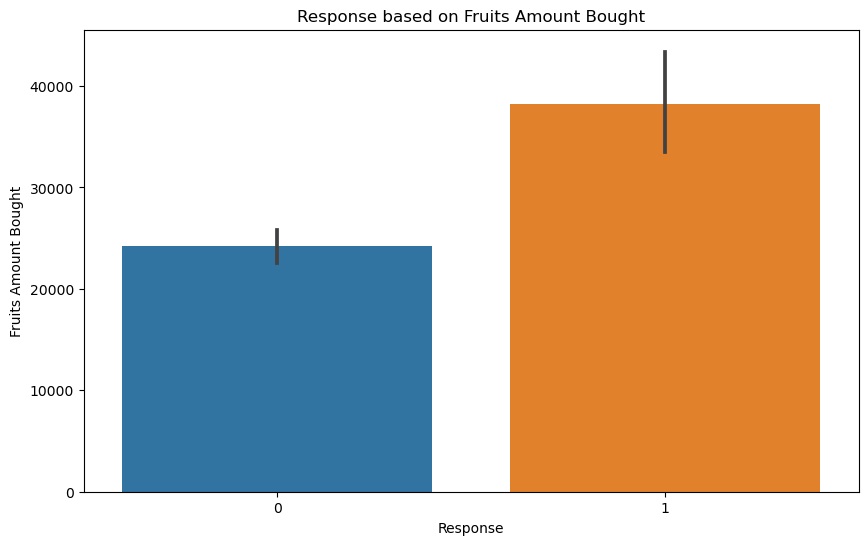

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='MntFruits', data=df)
plt.title('Response based on Fruits Amount Bought')
plt.xlabel('Response')
plt.ylabel('Fruits Amount Bought')
plt.show()

#### MntMeatProducts & Conversion Rate

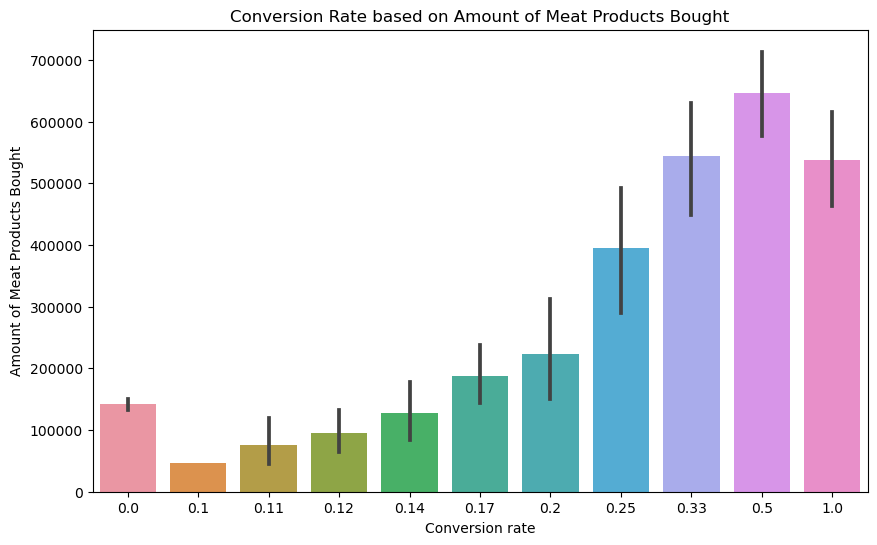

In [89]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='MntMeatProducts', data=df)
plt.title('Conversion Rate based on Amount of Meat Products Bought')
plt.xlabel('Conversion rate')
plt.ylabel('Amount of Meat Products Bought')
plt.show()

#### MntMeatProducts & Response

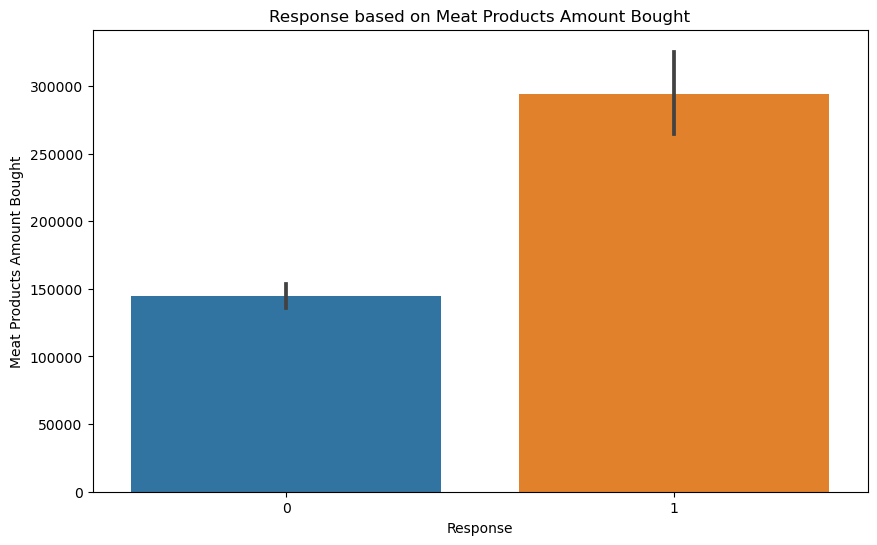

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='MntMeatProducts', data=df)
plt.title('Response based on Meat Products Amount Bought')
plt.xlabel('Response')
plt.ylabel('Meat Products Amount Bought')
plt.show()

#### MntFishProducts & Conversion Rate

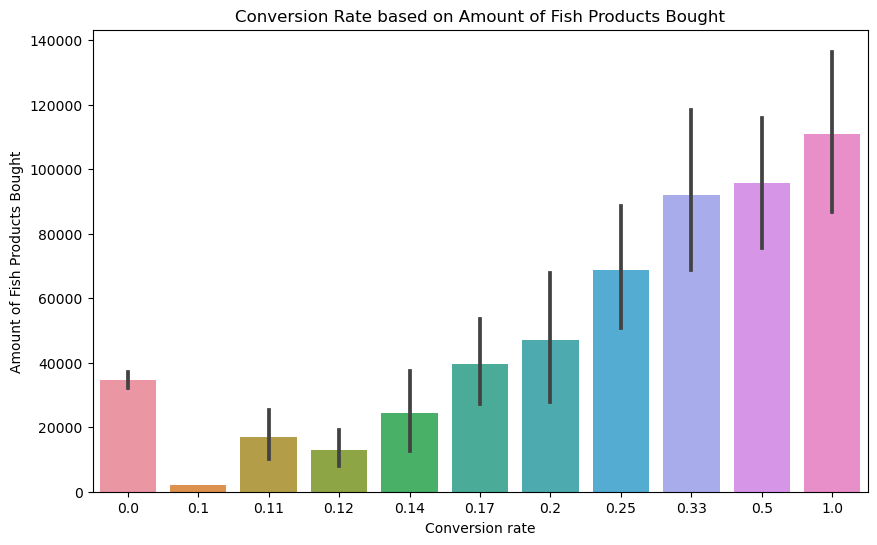

In [91]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='MntFishProducts', data=df)
plt.title('Conversion Rate based on Amount of Fish Products Bought')
plt.xlabel('Conversion rate')
plt.ylabel('Amount of Fish Products Bought')
plt.show()

#### MntFishProducts & Response

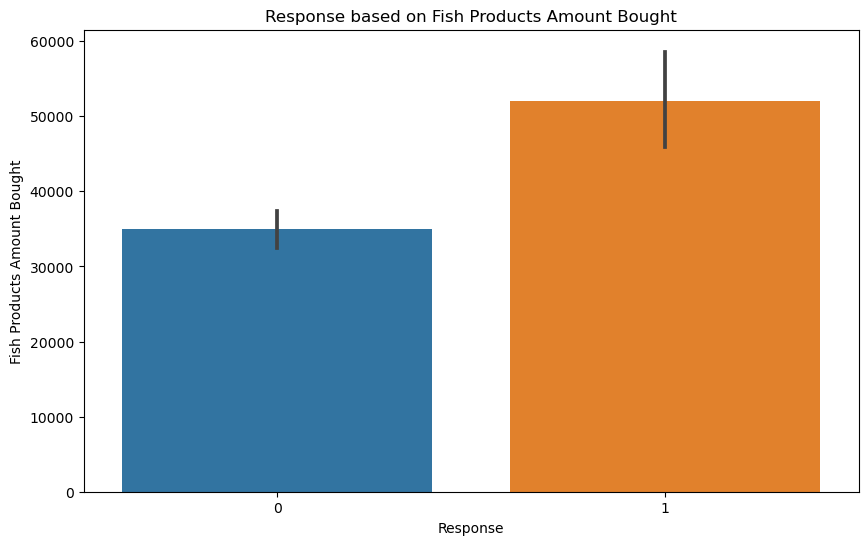

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='MntFishProducts', data=df)
plt.title('Response based on Fish Products Amount Bought')
plt.xlabel('Response')
plt.ylabel('Fish Products Amount Bought')
plt.show()

#### MntSweetProducts & Conversion Rate

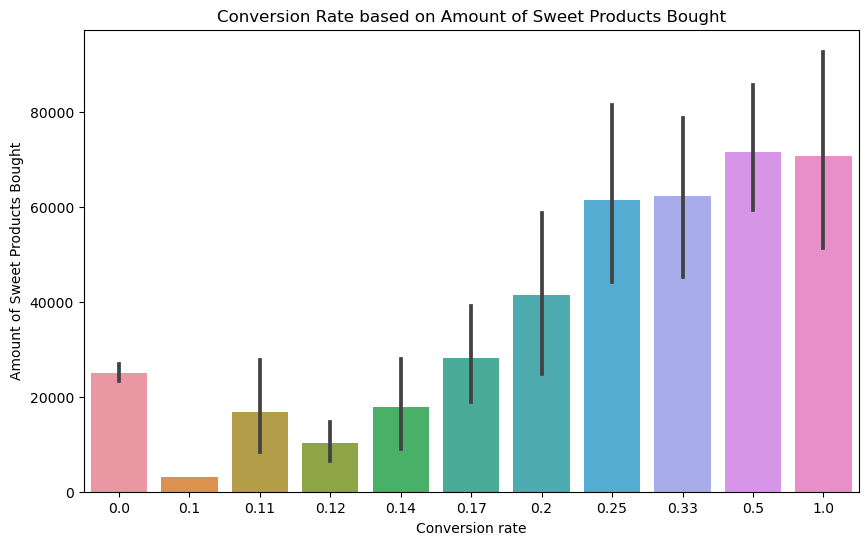

In [93]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='MntSweetProducts', data=df)
plt.title('Conversion Rate based on Amount of Sweet Products Bought')
plt.xlabel('Conversion rate')
plt.ylabel('Amount of Sweet Products Bought')
plt.show()

#### MntSweetProducts & Response

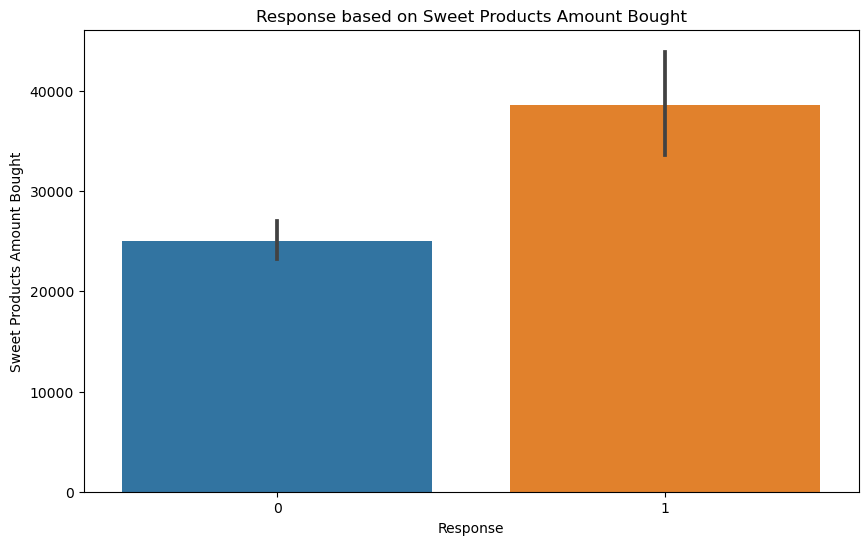

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='MntSweetProducts', data=df)
plt.title('Response based on Sweet Products Amount Bought')
plt.xlabel('Response')
plt.ylabel('Sweet Products Amount Bought')
plt.show()

#### MntGoldProds & Conversion Rate

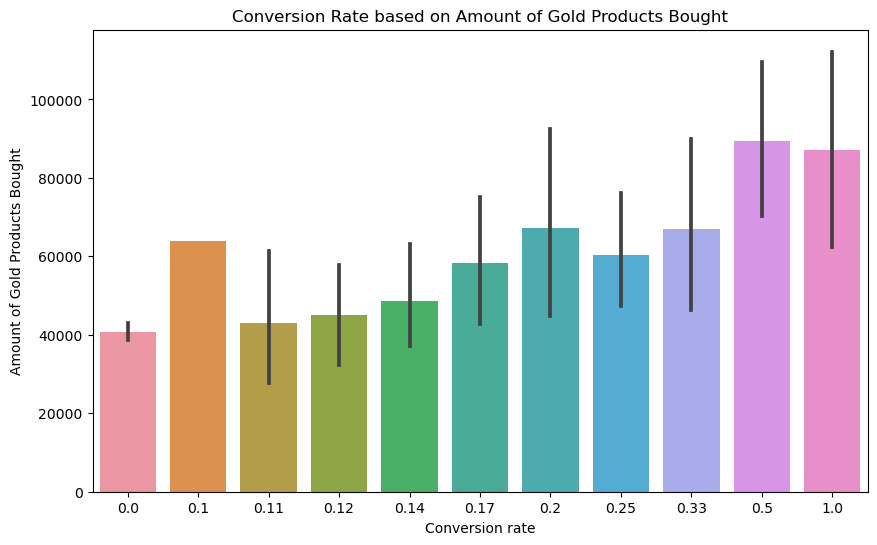

In [95]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='MntGoldProds', data=df)
plt.title('Conversion Rate based on Amount of Gold Products Bought')
plt.xlabel('Conversion rate')
plt.ylabel('Amount of Gold Products Bought')
plt.show()

#### MntGoldProds & Response

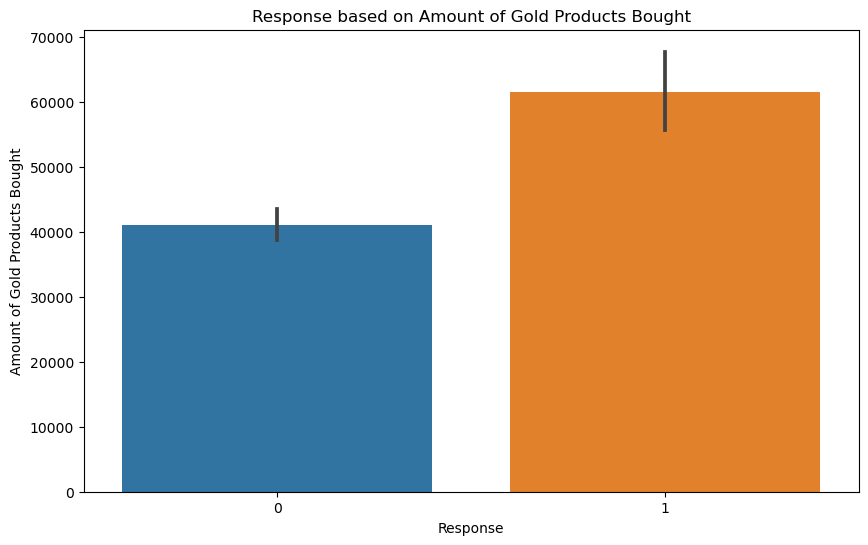

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='MntGoldProds', data=df)
plt.title('Response based on Amount of Gold Products Bought')
plt.xlabel('Response')
plt.ylabel('Amount of Gold Products Bought')
plt.show()

#### Total Campaign Accepted & Conversion Rate

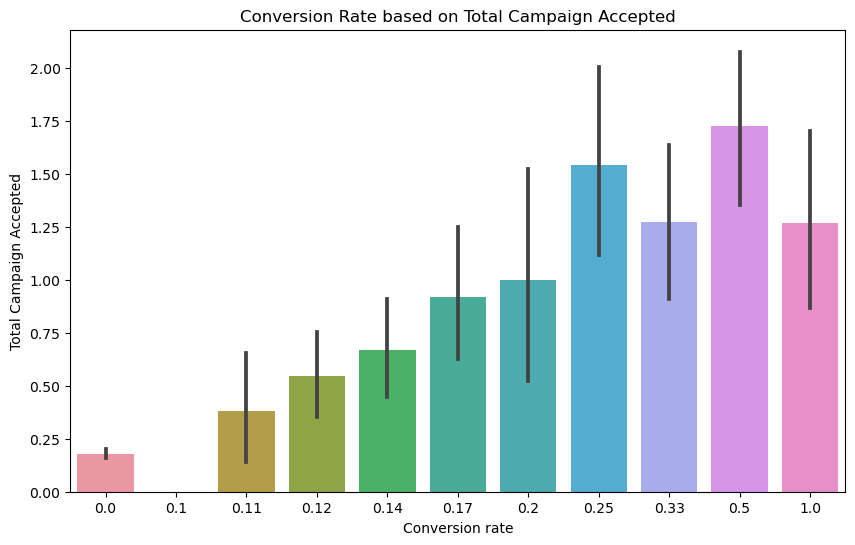

In [97]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='total_acc_campaign', data=df)
plt.title('Conversion Rate based on Total Campaign Accepted')
plt.xlabel('Conversion rate')
plt.ylabel('Total Campaign Accepted')
plt.show()

#### Total Campaign Accepted & Response

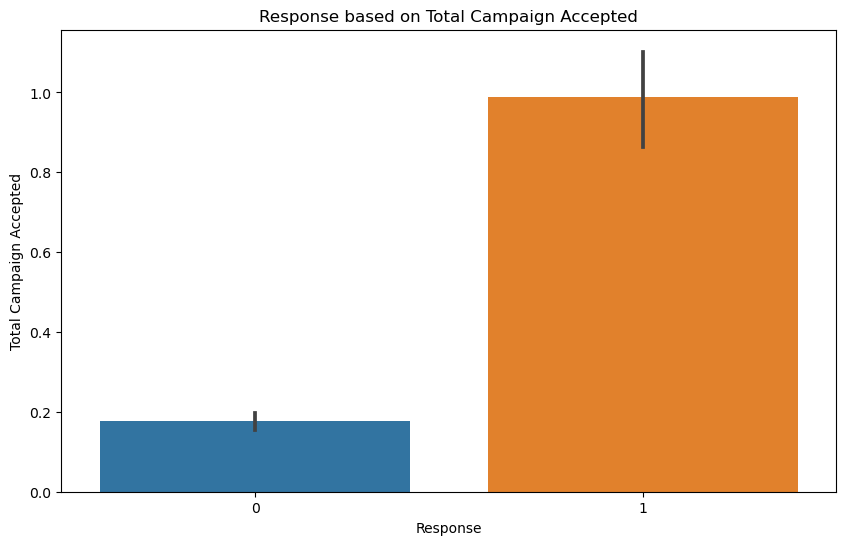

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='total_acc_campaign', data=df)
plt.title('Response based on Total Campaign Accepted')
plt.xlabel('Response')
plt.ylabel('Total Campaign Accepted')
plt.show()

### b. Categorical

#### Age Group & Conversion Rate

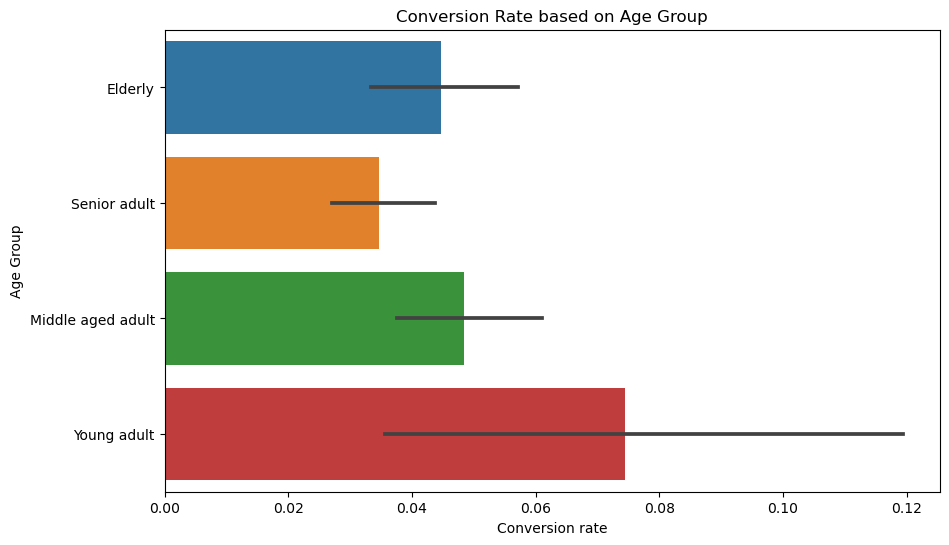

In [101]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='Age_Group', data=df)
plt.title('Conversion Rate based on Age Group')
plt.xlabel('Conversion rate')
plt.ylabel('Age Group')
plt.show()

#### Education & Conversion Rate

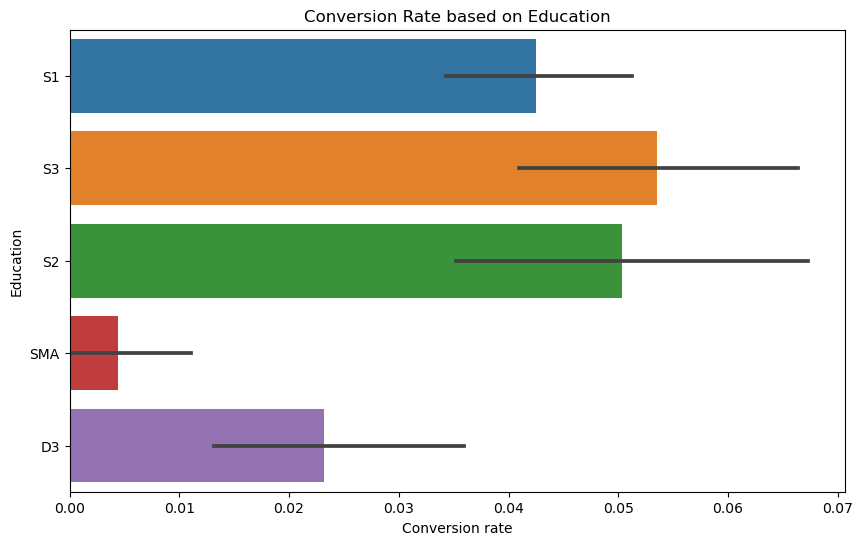

In [102]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='Education', data=df)
plt.title('Conversion Rate based on Education')
plt.xlabel('Conversion rate')
plt.ylabel('Education')
plt.show()

#### Marital Status & Conversion Rate

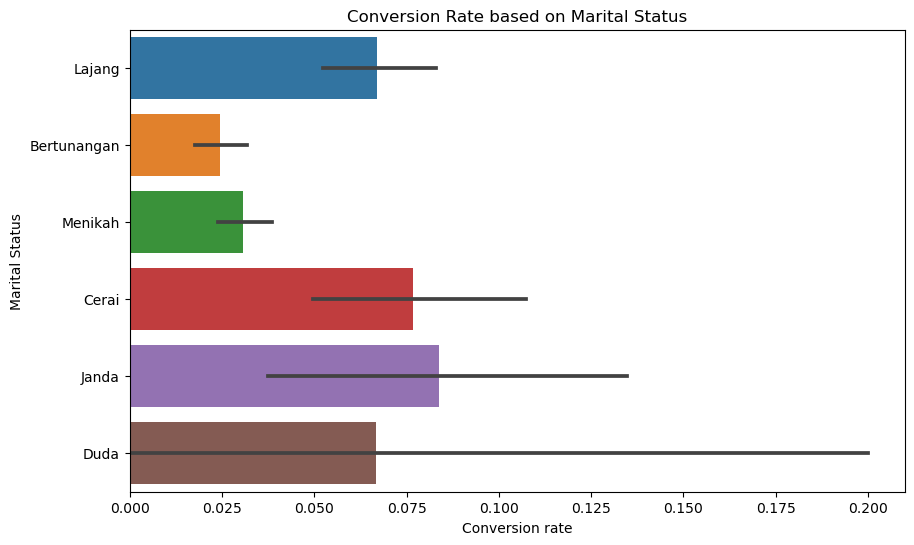

In [103]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='Marital_Status', data=df)
plt.title('Conversion Rate based on Marital Status')
plt.xlabel('Conversion rate')
plt.ylabel('Marital Status')
plt.show()

#### Complain & Conversion Rate

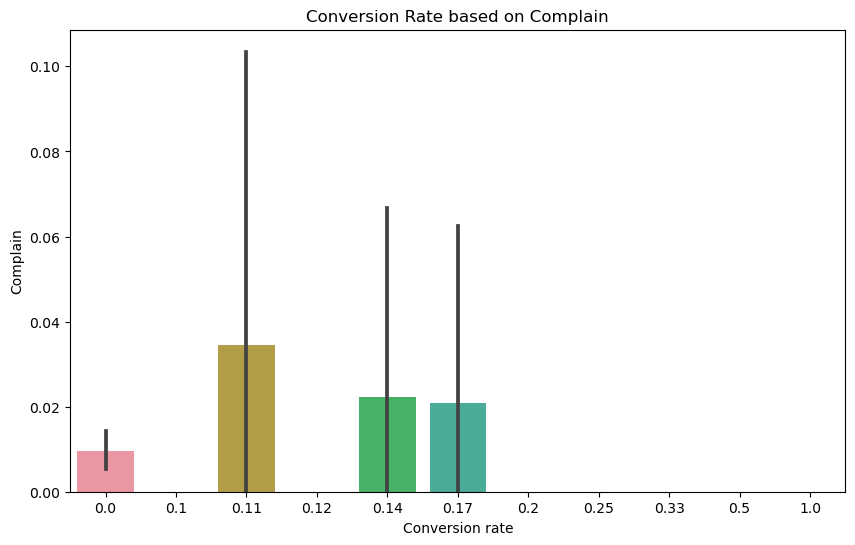

In [104]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='Complain', data=df)
plt.title('Conversion Rate based on Complain')
plt.xlabel('Conversion rate')
plt.ylabel('Complain')
plt.show()

#### Response & Conversion Rate

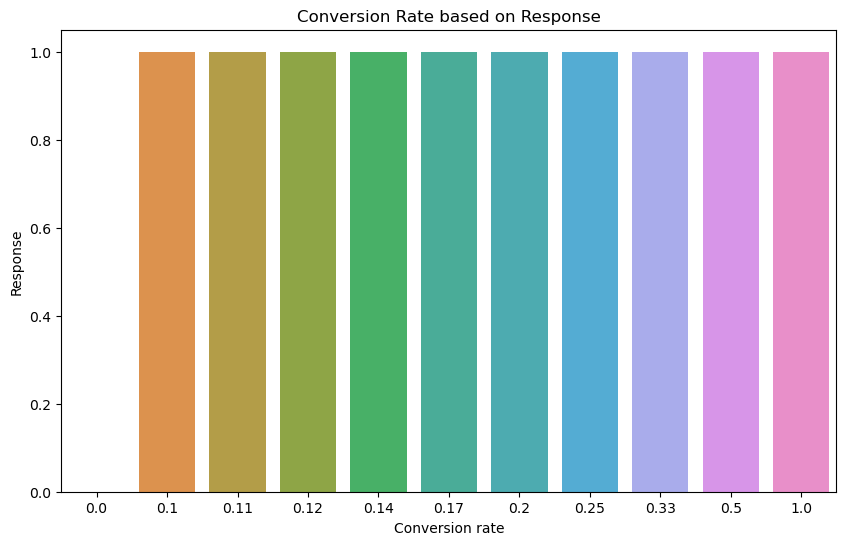

In [105]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='Response', data=df)
plt.title('Conversion Rate based on Response')
plt.xlabel('Conversion rate')
plt.ylabel('Response')
plt.show()

#### AcceptedCmp1 & Conversion Rate

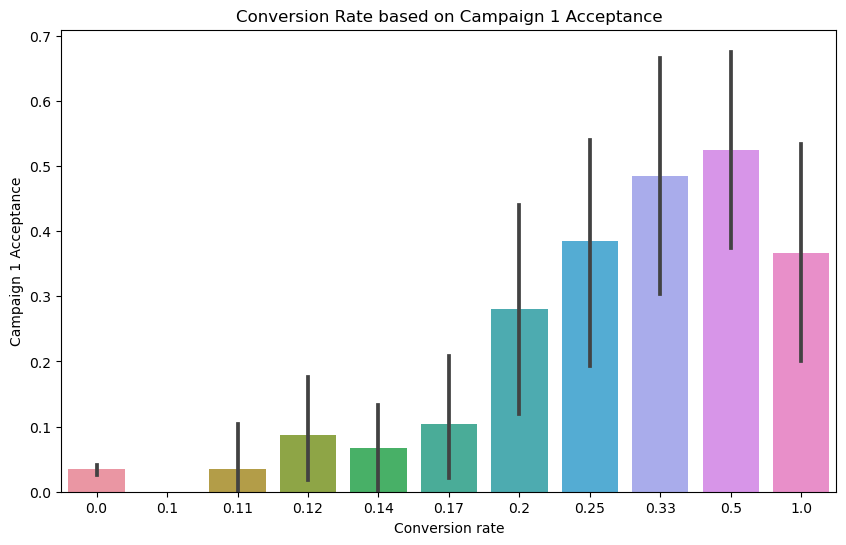

In [106]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='AcceptedCmp1', data=df)
plt.title('Conversion Rate based on Campaign 1 Acceptance')
plt.xlabel('Conversion rate')
plt.ylabel('Campaign 1 Acceptance')
plt.show()

#### AcceptedCmp2 & Conversion Rate

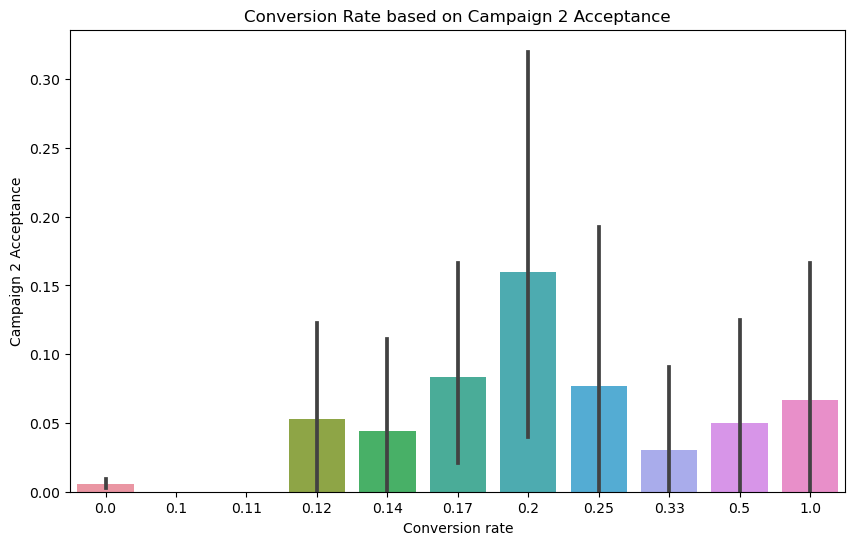

In [107]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='AcceptedCmp2', data=df)
plt.title('Conversion Rate based on Campaign 2 Acceptance')
plt.xlabel('Conversion rate')
plt.ylabel('Campaign 2 Acceptance')
plt.show()

#### AcceptedCmp3 & Conversion Rate

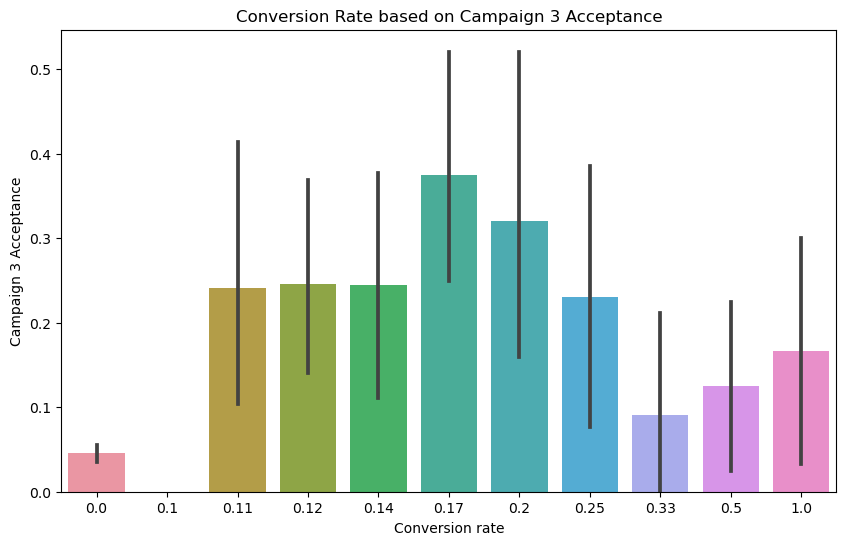

In [108]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='AcceptedCmp3', data=df)
plt.title('Conversion Rate based on Campaign 3 Acceptance')
plt.xlabel('Conversion rate')
plt.ylabel('Campaign 3 Acceptance')
plt.show()

#### AcceptedCmp4 & Conversion Rate

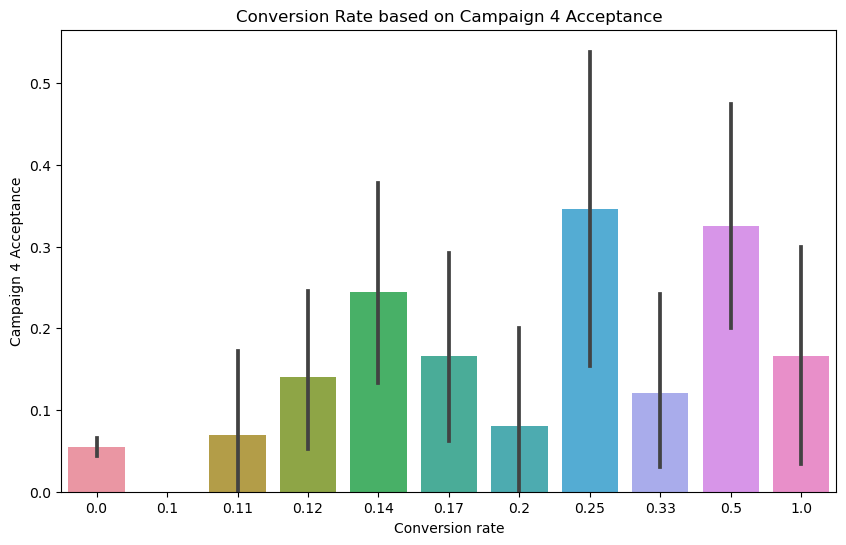

In [109]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='AcceptedCmp4', data=df)
plt.title('Conversion Rate based on Campaign 4 Acceptance')
plt.xlabel('Conversion rate')
plt.ylabel('Campaign 4 Acceptance')
plt.show()

#### AcceptedCmp5 & Conversion Rate

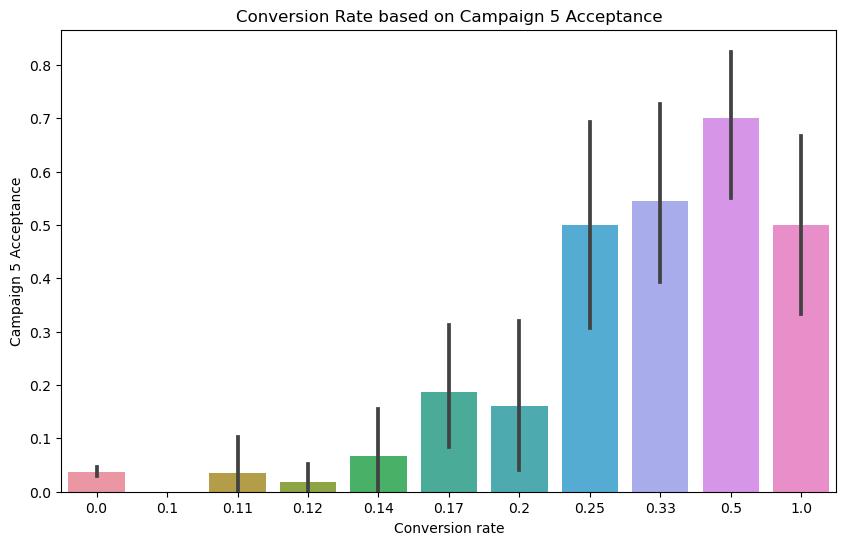

In [110]:
cr = round(df['conversion_rate'],2)

plt.figure(figsize=(10, 6))
sns.barplot(x=cr, y='AcceptedCmp5', data=df)
plt.title('Conversion Rate based on Campaign 5 Acceptance')
plt.xlabel('Conversion rate')
plt.ylabel('Campaign 5 Acceptance')
plt.show()

## Multivariate Analysis

In [111]:
# pearson correlation
plt.figure(figsize=(60,30),dpi=300)

sns.heatmap(df.corr(numeric_only=True,method='pearson'),
            fmt='.3f',
            annot=True,
            cmap='BrBG',
            vmin=-1)
plt.title('Pearson Correlation')

Text(0.5, 1.0, 'Pearson Correlation')

In [112]:
df_ed = df[['Age','Income', 'total_transaksi', 'total_pengeluaran', 'total_acc_campaign','conversion_rate']]

Text(0.5, 1.0, 'Pearson Correlation')

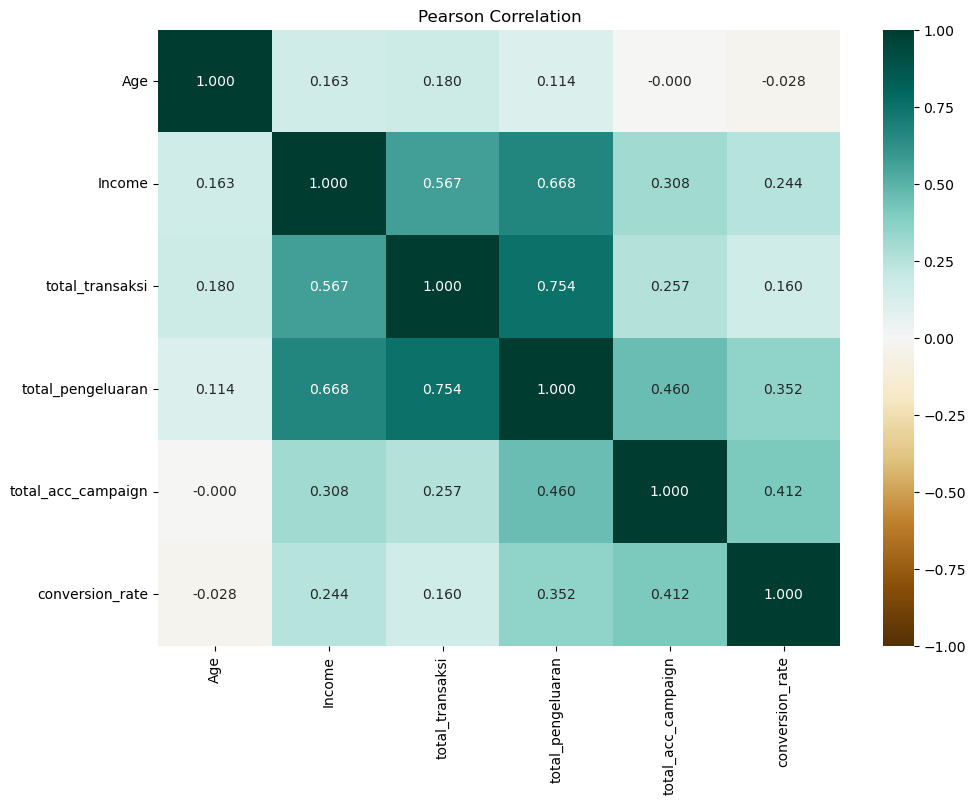

In [113]:
# pearson correlation
plt.figure(figsize=(11,8))

sns.heatmap(df_ed.corr(numeric_only=True,method='pearson'),
            fmt='.3f',
            annot=True,
            cmap='BrBG',
            vmin=-1)
plt.title('Pearson Correlation')

## 2.0 Data Cleaning & Preprocessing

### 2.1 Missing Value

In [18]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
conversion_rate        11
Age                     0
Age_Group               0
jumlah_anak             0
total_pengeluaran       0
total_transaksi         0
total_acc_campaign      0
dtype: int64

Missing value can be seen from two column, Income and conversion rate.
After further analysis of conversion rate columns, the missing value is resulted from 0 value for both column response and NumWebVisitsMonth. Hence, the missing value will be replaced with 0. Meanwhile, the missing value for income will be replaced with median considering the to the data that is skewed.

In [19]:
# Fill in missing value with the mean of Income column
df['Income'] = df['Income'].fillna(df['Income'].median())

In [20]:
# There seems to be a missing value for this column, and after further analysis, the missing value is resulted from 0 value for both column response and NumWebVisitsMonth. Hence, the missing value will be replaced with 0.
df['conversion_rate'] = df['conversion_rate'].fillna(0)

In [21]:
df.isnull().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
conversion_rate        0
Age                    0
Age_Group              0
jumlah_anak            0
total_pengeluaran      0
total_transaksi        0
total_acc_campaign     0
dtype: int64

After filling in the data, no more missing value.

### 2.2 Duplicate Data

In [22]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, conversion_rate, Age, Age_Group, jumlah_anak, total_pengeluaran, total_transaksi, total_acc_campaign]
Index: []

[0 rows x 37 columns]

There is no duplicate data

### 2.3 Feature Encoding

In [23]:
df.Education.value_counts()

Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: count, dtype: int64

In [24]:
education_order = ['SMA', 'D3', 'S1', 'S2', 'S3']
df['Education_Ordinal'] = df['Education'].map(lambda x: education_order.index(x))


In [25]:
age_group_order = ['Childhood', 'Teen', 'Young adult', 'Middle aged adult', 'Senior adult', 'Elderly']
df['Age_Group_Ordinal'] = df['Age_Group'].map(lambda x: age_group_order.index(x))

In [26]:
for cat in ['Marital_Status']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [27]:
df.Education_Ordinal.value_counts()

Education_Ordinal
2    1127
4     486
3     370
1     203
0      54
Name: count, dtype: int64

In [28]:
df.Age_Group_Ordinal.value_counts()

Age_Group_Ordinal
4    803
3    727
5    619
2     91
Name: count, dtype: int64

### 2.3 Feature Selection

Correlation Method

In [30]:
# Drop columns that has no relevance and redundant based on pearson correlation
df_new = df.drop(columns=['Year_Birth','Kidhome','Teenhome','Response',
                         'MntCoke', 'MntFruits','MntMeatProducts',
                         'MntSweetProducts','MntFishProducts','MntGoldProds',
                         'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                         'Education','Marital_Status','Age_Group','Unnamed: 0','ID',
                         'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                         'Age', 'total_pengeluaran', 'Dt_Customer','Z_CostContact','Z_Revenue']).copy()

Text(0.5, 1.0, 'Pearson Correlation')

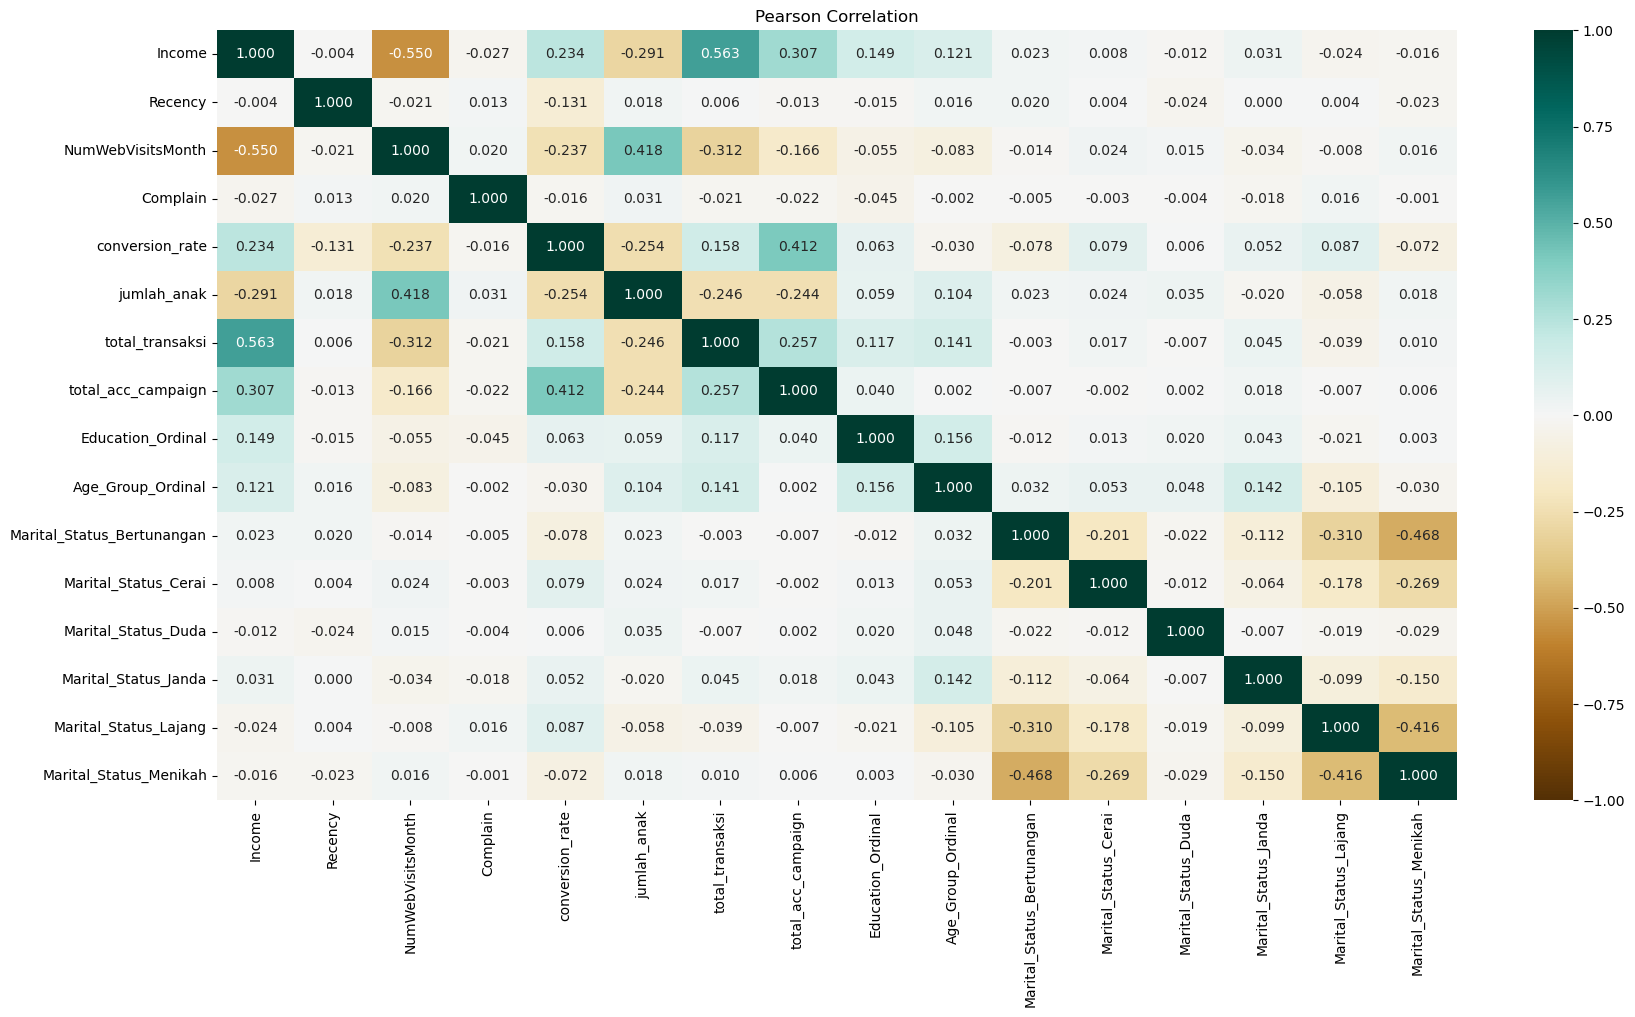

In [31]:
plt.figure(figsize=(20,10))

sns.heatmap(df_new.corr(numeric_only=True,method='pearson'),
            fmt='.3f',
            annot=True,
            cmap='BrBG',
            vmin=-1)
plt.title('Pearson Correlation')

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      2240 non-null   float64
 1   Recency                     2240 non-null   int64  
 2   NumWebVisitsMonth           2240 non-null   int64  
 3   Complain                    2240 non-null   int64  
 4   conversion_rate             2240 non-null   float64
 5   jumlah_anak                 2240 non-null   int64  
 6   total_transaksi             2240 non-null   int64  
 7   total_acc_campaign          2240 non-null   int64  
 8   Education_Ordinal           2240 non-null   int64  
 9   Age_Group_Ordinal           2240 non-null   int64  
 10  Marital_Status_Bertunangan  2240 non-null   bool   
 11  Marital_Status_Cerai        2240 non-null   bool   
 12  Marital_Status_Duda         2240 non-null   bool   
 13  Marital_Status_Janda        2240 

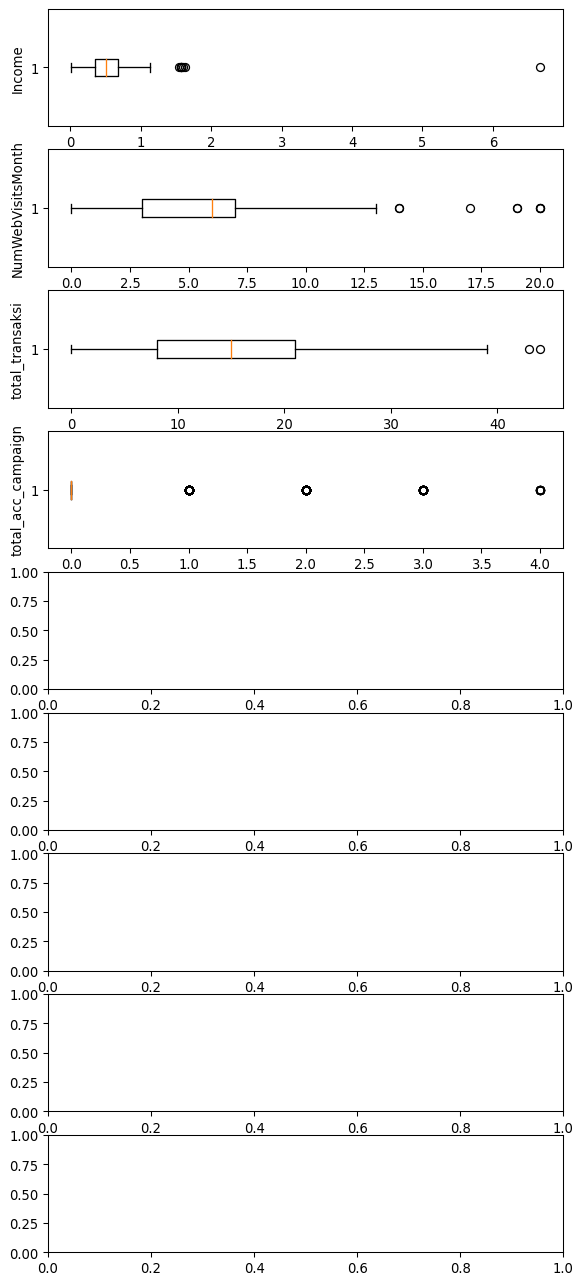

In [33]:
# Check outliers using box plot
columns_scale = ['Income', 'NumWebVisitsMonth','total_transaksi','total_acc_campaign']

fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df[columns_scale].columns:
    axs[i].boxplot(df_new[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()


### 2.4 Feature Transformation (Standardization)

In [34]:
df_new.describe()

Income      Recency  NumWebVisitsMonth     Complain  \
count  2.240000e+03  2240.000000        2240.000000  2240.000000   
mean   5.223798e+07    49.109375           5.316518     0.009375   
std    2.503796e+07    28.962453           2.426645     0.096391   
min    1.730000e+06     0.000000           0.000000     0.000000   
25%    3.553875e+07    24.000000           3.000000     0.000000   
50%    5.138150e+07    49.000000           6.000000     0.000000   
75%    6.828975e+07    74.000000           7.000000     0.000000   
max    6.666660e+08    99.000000          20.000000     1.000000   

       conversion_rate  jumlah_anak  total_transaksi  total_acc_campaign  \
count      2240.000000  2240.000000      2240.000000         2240.000000   
mean          0.043471     0.950446        14.862054            0.297768   
std           0.142662     0.751803         7.677173            0.678381   
min           0.000000     0.000000         0.000000            0.000000   
25%           0.000000     0.000000         8.000000            0.000000   
50%           0.000000     1.000000        15.000000            0.000000   
75%           0.000000     1.000000        21.000000            0.000000   
max           1.000000     3.000000        44.000000            4.000000   

       Education_Ordinal  Age_Group_Ordinal  
count        2240.000000        2240.000000  
mean            2.460268           3.870536  
std             1.004337           0.864272  
min             0.000000           2.000000  
25%             2.000000           3.000000  
50%             2.000000           4.000000  
75%             3.000000           5.000000  
max             4.000000           5.000000

In [35]:
from sklearn.preprocessing import StandardScaler

# List of columns to standardize
columns_scale = ['Income', 'Recency', 'NumWebVisitsMonth','total_transaksi','total_acc_campaign']

scaler = StandardScaler()

for i in columns_scale:
    df_new[i] = scaler.fit_transform(df_new[i].values.reshape(-1, 1))

In [36]:
df_new.describe()

Income       Recency  NumWebVisitsMonth     Complain  \
count  2.240000e+03  2.240000e+03       2.240000e+03  2240.000000   
mean  -1.300547e-16 -3.172066e-18      -6.344132e-17     0.009375   
std    1.000223e+00  1.000223e+00       1.000223e+00     0.096391   
min   -2.017707e+00 -1.696001e+00      -2.191381e+00     0.000000   
25%   -6.671053e-01 -8.671566e-01      -9.548307e-01     0.000000   
50%   -3.421472e-02 -3.777284e-03       2.817201e-01     0.000000   
75%    6.412408e-01  8.596020e-01       6.939037e-01     0.000000   
max    2.454534e+01  1.722981e+00       6.052291e+00     1.000000   

       conversion_rate  jumlah_anak  total_transaksi  total_acc_campaign  \
count      2240.000000  2240.000000     2.240000e+03        2.240000e+03   
mean          0.043471     0.950446    -1.110223e-17        9.516197e-18   
std           0.142662     0.751803     1.000223e+00        1.000223e+00   
min           0.000000     0.000000    -1.936308e+00       -4.390371e-01   
25%           0.000000     0.000000    -8.940252e-01       -4.390371e-01   
50%           0.000000     1.000000     1.797240e-02       -4.390371e-01   
75%           0.000000     1.000000     7.996846e-01       -4.390371e-01   
max           1.000000     3.000000     3.796248e+00        5.458673e+00   

       Education_Ordinal  Age_Group_Ordinal  
count        2240.000000        2240.000000  
mean            2.460268           3.870536  
std             1.004337           0.864272  
min             0.000000           2.000000  
25%             2.000000           3.000000  
50%             2.000000           4.000000  
75%             3.000000           5.000000  
max             4.000000           5.000000

## 3.0 Data Modeling

### 3.1 Elbow Method

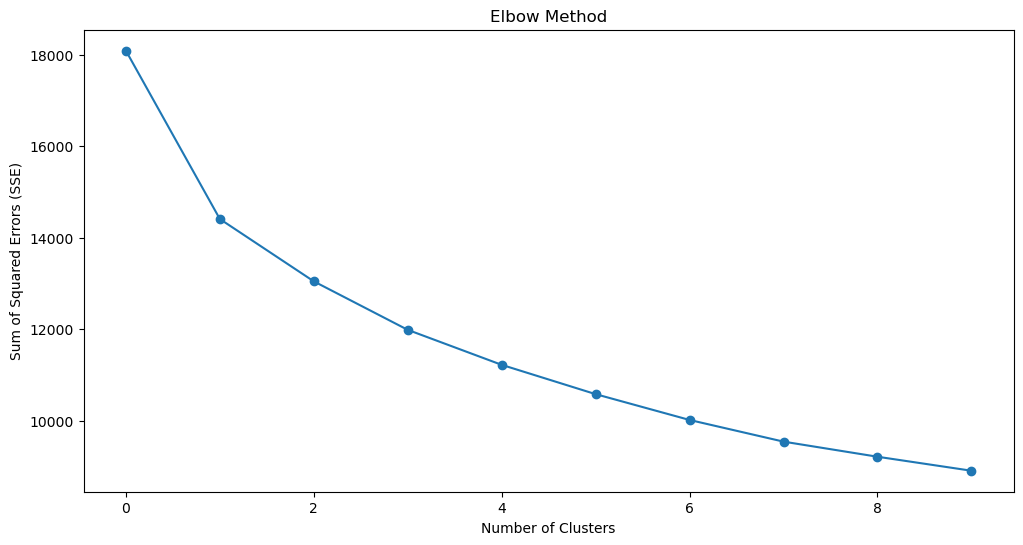

In [37]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, 
                    n_init=10, random_state=0)
    kmeans.fit(df_new.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

Based on figure above, the optimal number of clusters is 3

### 3.2 K-Means Clustering

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, 
                n_init=10, random_state=0)
kmeans.fit(df_new.values)
df_new['km_labels'] = kmeans.labels_

[]

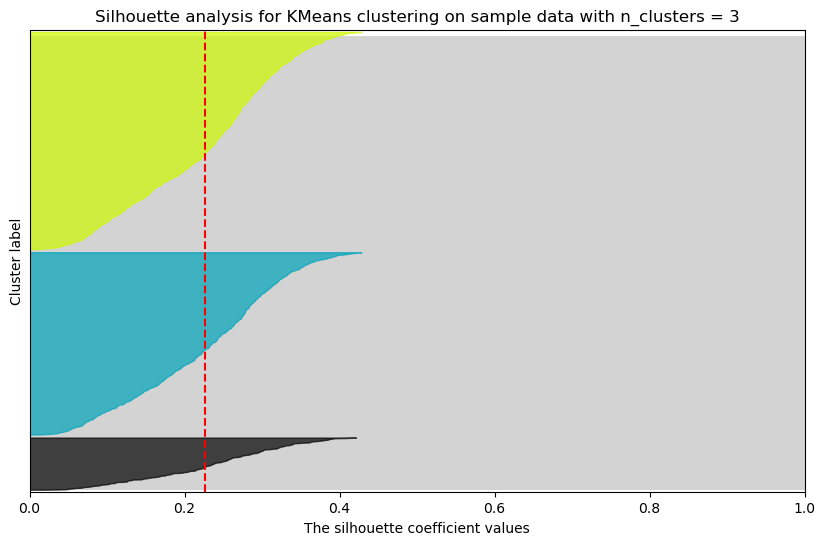

In [39]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# Get the numerical columns
numer_cols = df_new.select_dtypes(include=['float', 'int']).columns

# Calculate the silhouette scores for each sample
cluster_labels = df_new['km_labels']
n_clusters = len(np.unique(cluster_labels))
silhouette_values = silhouette_samples(df_new[numer_cols].values, cluster_labels)

# Create the silhouette plot
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
y_lower = 10

# Plot the silhouette values
ax1.set_xlim([0, 1])
ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
y_upper = y_lower + len(cluster_labels)
cluster_silhouette_values = silhouette_values.copy()
cluster_silhouette_values.sort()
y_ax_upper = len(cluster_labels) + (n_clusters + 1) * 10
rect = plt.Rectangle((0, y_lower), 1, y_upper - y_lower, edgecolor='none', facecolor='lightgray')
ax1.add_patch(rect)

for i in range(n_clusters):
    cluster_values = cluster_silhouette_values[cluster_labels == i]
    cluster_values.sort()
    size_cluster_i = cluster_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper +10

ax1.set_title("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters)
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_score(df_new[numer_cols].values, cluster_labels), color="red", linestyle="--")
ax1.set_yticks([])

In [40]:
print(silhouette_score(df_new[numer_cols].values, cluster_labels))

0.2259569760203769


### 3.3 Evaluation using PCA

<Axes: xlabel='PC1', ylabel='PC2'>

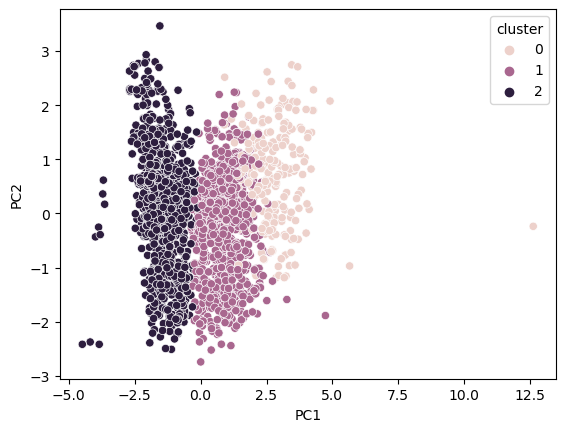

In [41]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(2)

# Convert to a data frame
pca_df = pd.DataFrame(pca.fit_transform(df_new), columns=['PC1','PC2'])
pca_df['cluster'] = df_new['km_labels']
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_df)


In [42]:
clusters = df_new.groupby('km_labels').mean()
print(clusters)

             Income   Recency  NumWebVisitsMonth  Complain  conversion_rate  \
km_labels                                                                     
0          1.188414 -0.003108          -0.911695  0.003876         0.201201   
1          0.503694 -0.002900          -0.421952  0.007735         0.034349   
2         -0.707942  0.003181           0.572966  0.012071         0.013352   

           jumlah_anak  total_transaksi  total_acc_campaign  \
km_labels                                                     
0             0.217054         0.773931            2.166928   
1             0.805525         0.753185           -0.259825   
2             1.247911        -0.818298           -0.300767   

           Education_Ordinal  Age_Group_Ordinal  Marital_Status_Bertunangan  \
km_labels                                                                     
0                   2.480620           3.813953                    0.236434   
1                   2.678453           4.092818    

In [46]:
import pandas as pd
import numpy as np

def create_cluster_summary(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns # Select numeric columns
    numeric_columns = [col for col in numeric_columns if col != 'km_labels']
    
    clusters_summary = df.groupby('km_labels').agg({
        col: ['mean', 'std', 'min', 'max'] for col in numeric_columns}) # Create a multi-level aggregation
    
    clusters_summary.columns = [f'{col}_{stat}' for col, stat in clusters_summary.columns]
    clusters_summary = clusters_summary.reset_index()
    cluster_sizes = df['km_labels'].value_counts().sort_index()
    clusters_summary['cluster_size'] = cluster_sizes.values
    total_samples = df.shape[0]
    clusters_summary['cluster_percentage'] = (clusters_summary['cluster_size'] / total_samples) * 100
    
    return clusters_summary


new_cluster_dataset = create_cluster_summary(df_new)
print(new_cluster_dataset)


   km_labels  Income_mean  Income_std  Income_min  Income_max  Recency_mean  \
0          0     1.188414    1.560559   -0.571619   24.545343     -0.003108   
1          1     0.503694    0.522150   -1.989064    4.400664     -0.002900   
2          2    -0.707942    0.466230   -2.017707    0.625391      0.003181   

   Recency_std  Recency_min  Recency_max  NumWebVisitsMonth_mean  ...  \
0     0.986152    -1.661466     1.722981               -0.911695  ...   
1     1.005411    -1.696001     1.722981               -0.421952  ...   
2     1.000111    -1.696001     1.722981                0.572966  ...   

   Education_Ordinal_mean  Education_Ordinal_std  Education_Ordinal_min  \
0                2.480620               0.930259                      1   
1                2.678453               0.946249                      1   
2                2.272052               1.031695                      0   

   Education_Ordinal_max  Age_Group_Ordinal_mean  Age_Group_Ordinal_std  \
0             

In [45]:
new_cluster_dataset.to_csv('cluster_summary.csv', index=False)

# Customer Personality Analysis for Marketing Retargeting

## Cluster 0 
Characteristics (11.52% of customers)
- Highest average income
- Lowest web visits
- Highest conversion rate
- Lowest number of children
- Highest total accepted campaigns
- Medium education level
- Youngest age group


Business Recommendations:

1. Premium Targeting: These are high-value customers with high conversion rates. Target them with premium products and exclusive offers.
2. Mobile Optimization: Despite low web visits, ensure mobile platforms are optimized as they might prefer mobile shopping.
3. Loyalty Program: Implement a high-tier loyalty program to retain these valuable customers.
4. Personalized Marketing: Use their high campaign acceptance rate to send personalized, exclusive offers.

## Cluster 1 
Characteristics (40.40% of customers)
- Medium income
- Medium web visits
- Low conversion rate
- Medium number of children
- Lowest campaign acceptance
- Highest education level
- Oldest age group

Business Recommendations:
1. Educational Content: Leverage their high education level by providing in-depth product information and educational content.
2. Family-Oriented Products: Offer products suitable for families with children.
3. Senior-Friendly Interface: Ensure the website is easy to navigate for older customers.

## Cluster 2 
Characteristics (48.08% of customers):
- Lowest income
- Highest web visits
- Very low conversion rate
- Highest number of children
- Low campaign acceptance
- Lowest education level
- Medium age group

Business Recommendations:
1. Budget-Friendly Options: Offer more affordable product lines or payment plans to cater to their lower income.
2. Family Bundles: Create cost-effective family bundles or bulk purchase options.
3. Simplified Messaging: Given the lower education level, ensure marketing messages and product information are clear and straightforward.
4. Engagement to Conversion: Implement strategies to turn their high engagement (web visits) into sales, such as limited-time offers or personalized recommendations.
5. Educational Marketing: Provide value through educational content about products to build trust and encourage purchases.